In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os
from scipy.stats import variation

In [2]:
df = pd.read_csv('Wholesale Customer.csv') 

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [78]:
df.Region.value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
# Check for missing value in any colum
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
df.shape

(440, 9)

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.50,127.16,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.30,12647.33,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.27,7380.38,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.28,9503.16,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.93,4854.67,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.49,4767.85,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.87,2820.11,3.0,408.25,965.5,1820.25,47943.0


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python

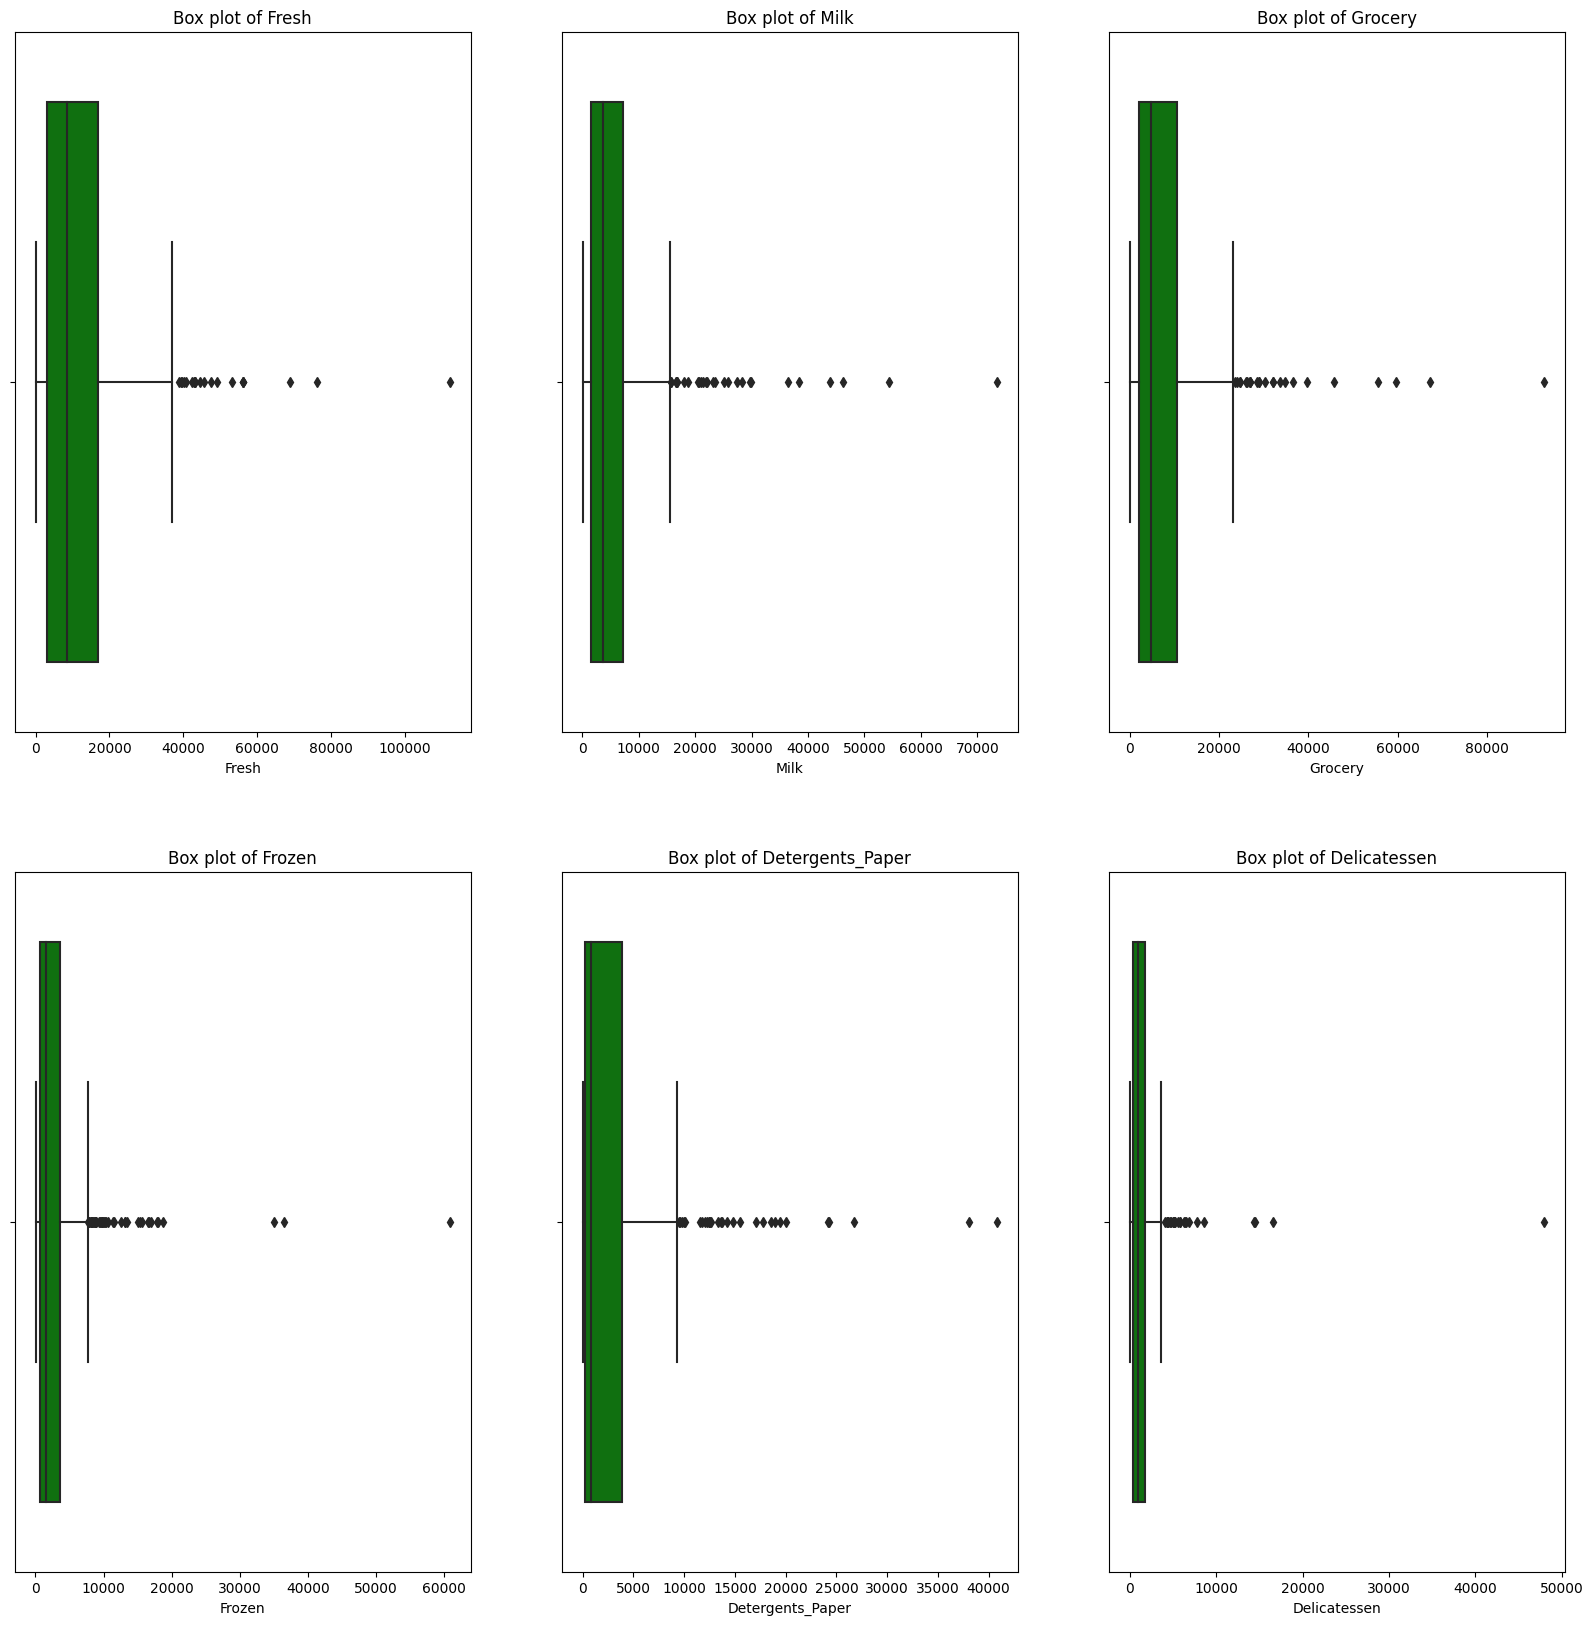

In [8]:
# Checking for Outliers
plt.figure(figsize= (20,20))
box_plot_no=1
for col in df.columns :
    if (col != 'Channel') and (col != 'Region') and (col != 'Buyer/Spender'):
        box_plot_title = "Box plot of " + col
        plt.subplot(2,3,box_plot_no)
        sns.boxplot(x= col,data =df ,color='green', orient = 'v').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 

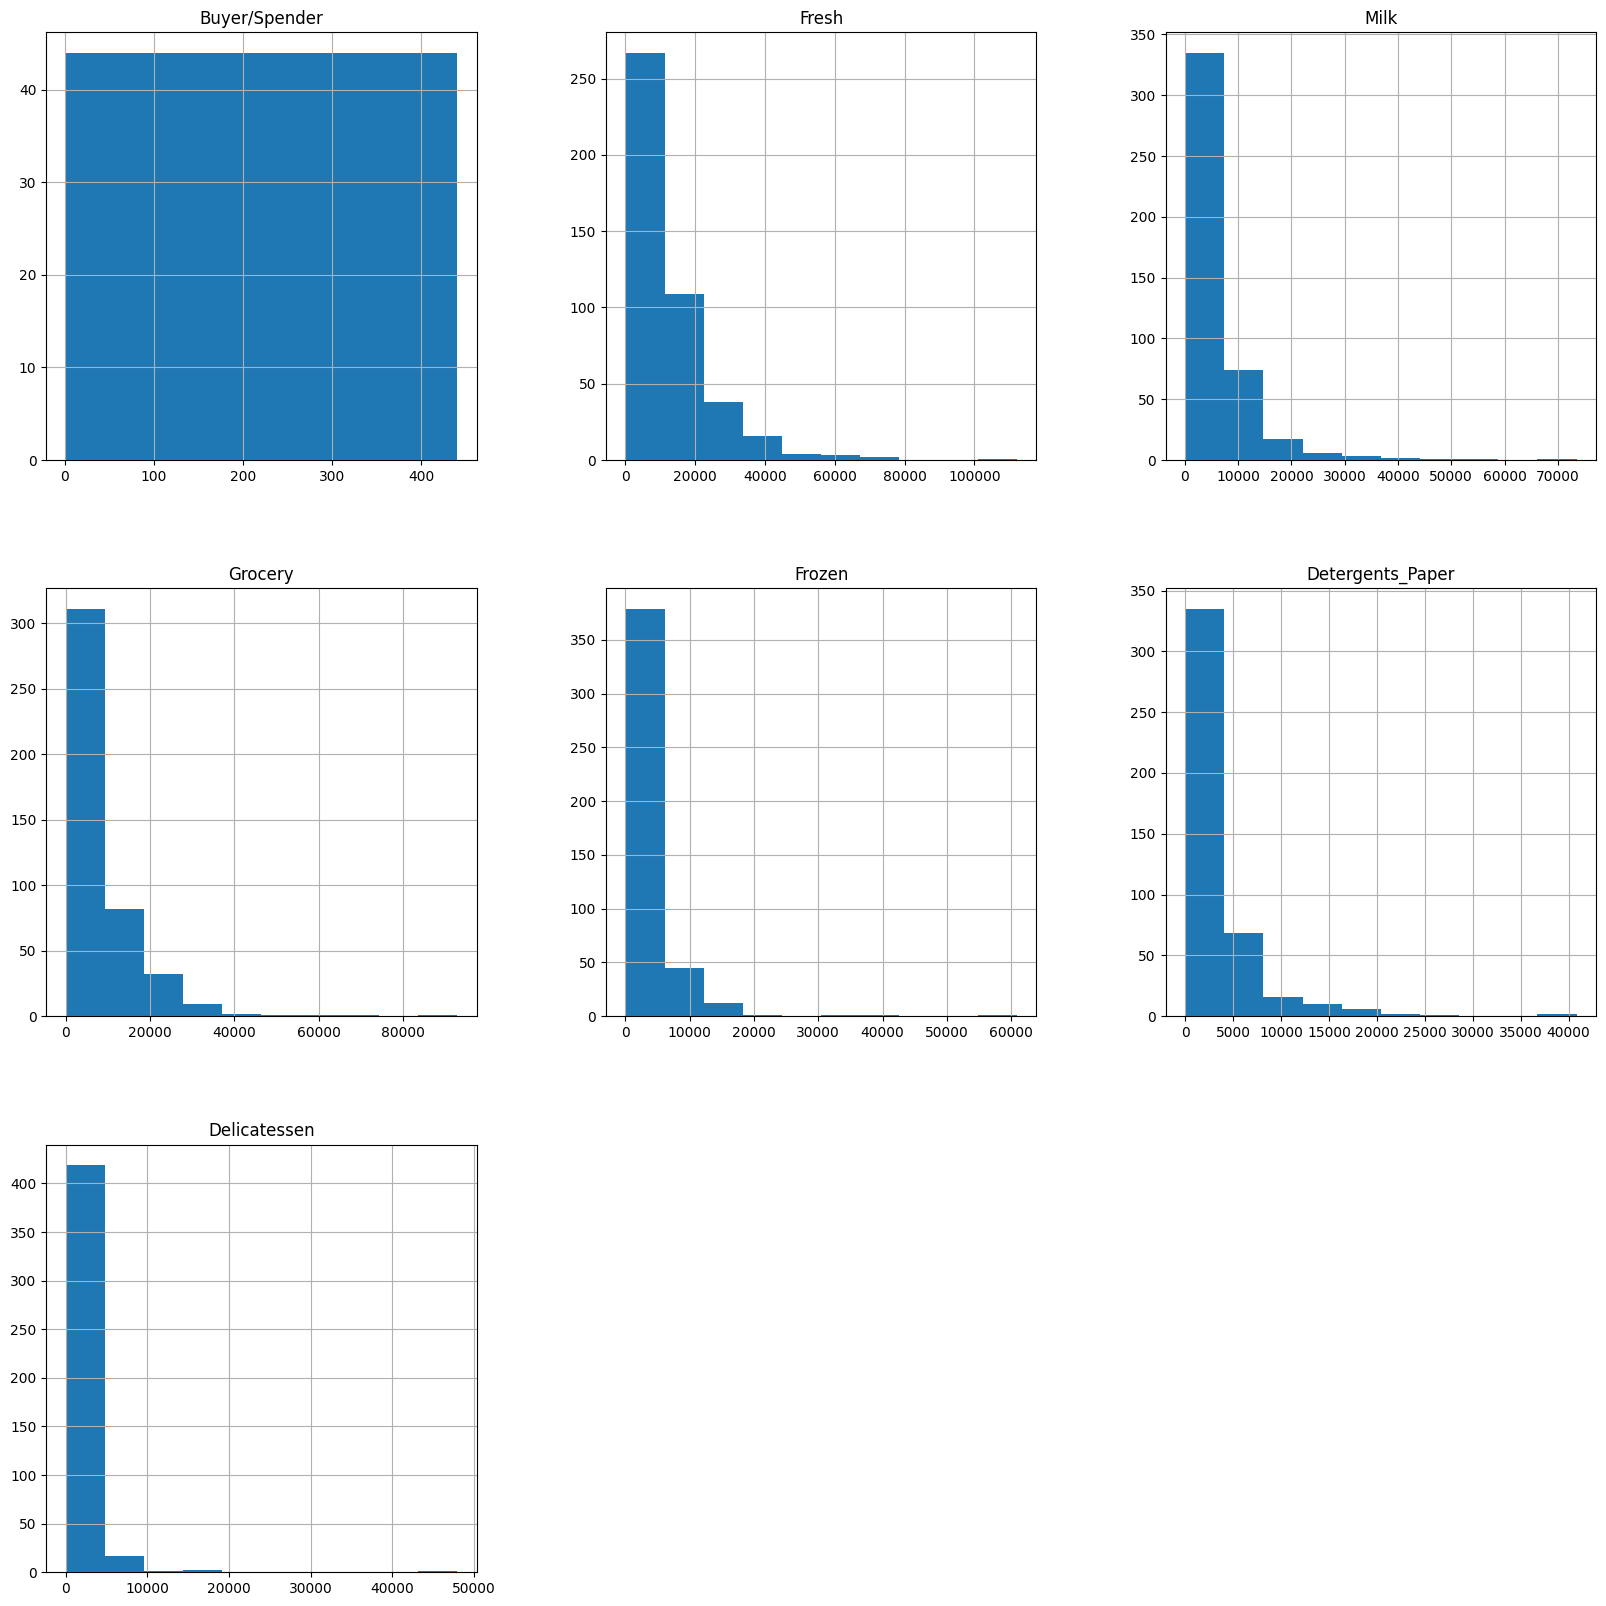

In [9]:
#Plots to see the distribution of the continuous features individually
df.hist(figsize=(20,20))
plt.show()

In [10]:
# adding a Total spend column in data 
df["Total_Spend"] = df["Fresh"] + df["Milk"] + df["Grocery"] + df["Frozen"] + df["Detergents_Paper"] + df["Delicatessen"]
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [11]:
# creating a pivot based on Region
dfa=pd.DataFrame(pd.pivot_table(df,index=['Region'],aggfunc=sum))
dfa.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfa

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\1612999395.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  dfa=pd.DataFrame(pd.pivot_table(df,index=['Region'],aggfunc=sum))


,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Region,,,,,,,,
Other,64026,512110,890410,3960577,930492,2495251,1888759,10677599
Lisbon,18095,104327,204136,854833,231026,570037,422454,2386813
Oporto,14899,54506,173311,464721,190132,433274,239144,1555088


In [12]:
first_row_index=0;
last_row_index=dfa.shape[0]-1;
#dfa.index[last_row_index]
print ('Region spending highest is {} and lowest is {}'.format(dfa.index[first_row_index],dfa.index[last_row_index]))

Region spending highest is Other and lowest is Oporto


In [13]:
# creating a pivot based on Channel
dfb=pd.pivot_table(df,index=['Channel'],aggfunc=sum)
dfb.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfb

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\357560823.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  dfb=pd.pivot_table(df,index=['Channel'],aggfunc=sum)


,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,71034,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,25986,248988,1032270,1264414,234671,2317845,1521743,6619931


In [14]:
first_row_index=0;
last_row_index=dfb.shape[0]-1;
#dfa.index[last_row_index]
print ('Channel spending highest is {} and lowest is {}'.format(dfb.index[first_row_index],dfb.index[last_row_index]))

Channel spending highest is Hotel and lowest is Retail


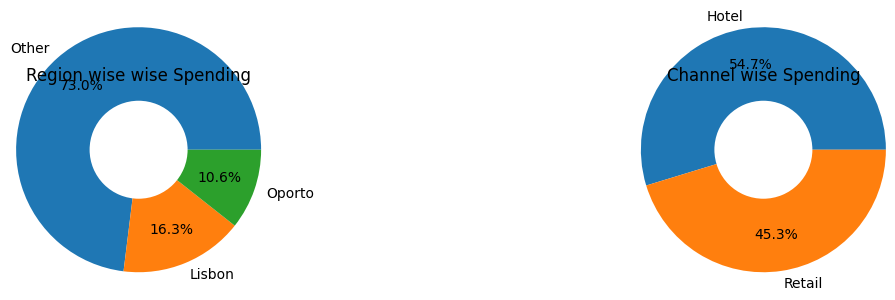

In [23]:
#creating a donut 
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,12)) 
ax1.pie(dfa["Total_Spend"],labels=dfa.index,autopct='%.1f%%',pctdistance=0.7,radius=2.5)
ax1.pie([1],colors=['w'],radius=1)

ax2.pie(dfb["Total_Spend"],labels=dfb.index,autopct='%.1f%%',pctdistance=0.7,radius=2.5)
ax2.pie([1],colors=['w'],radius=1)
ax1.title.set_position([.5, 0.2])
ax1.title.set_text("Region wise wise Spending")
ax2.title.set_position([.5, 0.2])
ax2.title.set_text("Channel wise Spending")
plt.tight_layout()

plt.show()

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\4017310479.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Region");


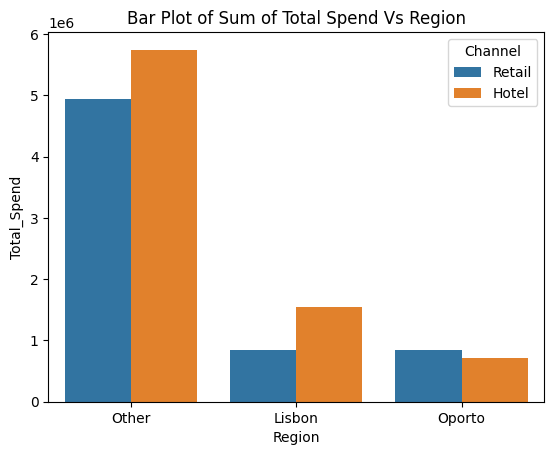

In [24]:
sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Region");

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\3039328786.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Channel', y ='Total_Spend' , hue='Region',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Channel");


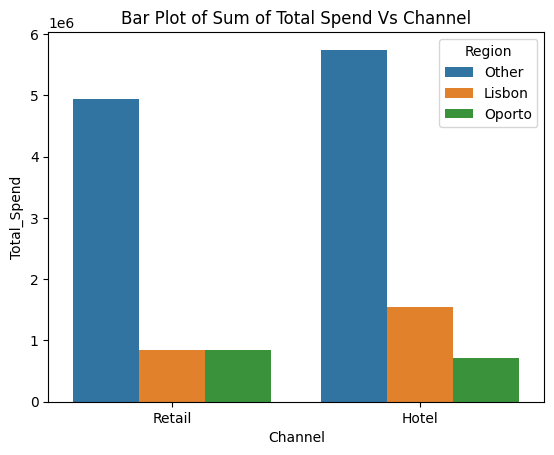

In [25]:
sns.barplot(x='Channel', y ='Total_Spend' , hue='Region',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Channel");

In [26]:
df_Other=df[df["Region"]=='Other']
df_Oporto=df[df["Region"]=='Oporto']
df_Lisbon=df[df["Region"]=='Lisbon']

In [27]:

# dropping series which are not required
df_Other.drop('Buyer/Spender',axis=1,inplace=True)
df_Other.drop('Total_Spend',axis=1,inplace=True)
df_Oporto.drop('Buyer/Spender',axis=1,inplace=True)
df_Oporto.drop('Total_Spend',axis=1,inplace=True)
df_Lisbon.drop('Buyer/Spender',axis=1,inplace=True)
df_Lisbon.drop('Total_Spend',axis=1,inplace=True)

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\820856472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Other.drop('Buyer/Spender',axis=1,inplace=True)
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\820856472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Other.drop('Total_Spend',axis=1,inplace=True)
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\820856472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [28]:
# creating a function to return CV array
def CV_row(df):   
    i=0;
    CV=[]
    for i in df.columns:
        if (i != 'Channel') and (i != 'Region') and (i != 'Buyer/Spender') and (i != 'Total_Spend'):
            CV_val=  round(variation(df[i]),2)
            CV.append(CV_val)

    return CV  

In [29]:
# creating a function to return skew array
def Skew_row(df):   
    i=0;
    Skew=[]
    for i in df.columns:
        if (i != 'Channel') and (i != 'Region') and (i != 'Buyer/Spender') and (i != 'Total_Spend'):
            Skew_val=  round(df[i].skew(),2)
            Skew.append(Skew_val)

    return Skew  

In [30]:
df_Other_summ=pd.DataFrame(df_Other.describe().round(2))
df_Other_summ.loc["CV"]= CV_row(df_Other)
df_Other_summ.loc["Skew"]= Skew_row(df_Other)
df_Other_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.00,316.00,316.00,316.00,316.00,316.00
mean,12533.47,5977.09,7896.36,2944.59,2817.75,1620.60
std,13389.21,7935.46,9537.29,4260.13,4593.05,3232.58
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3350.75,1634.00,2141.50,664.75,251.25,402.00
50%,8752.50,3684.50,4732.00,1498.00,856.00,994.00
75%,17406.50,7198.75,10559.75,3354.75,3875.75,1832.75
max,112151.00,73498.00,92780.00,36534.00,40827.00,47943.00
CV,1.07,1.33,1.21,1.44,1.63,1.99
Skew,2.62,4.25,3.84,3.96,3.71,10.21


In [31]:
df_Oporto_summ=pd.DataFrame(df_Oporto.describe().round(2))
df_Oporto_summ.loc["CV"]= CV_row(df_Oporto)
df_Oporto_summ.loc["Skew"]= Skew_row(df_Oporto)
df_Oporto_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.00,47.00,47.00,47.00,47.00,47.00
mean,9887.68,5088.17,9218.60,4045.36,3687.47,1159.70
std,8387.90,5826.34,10842.75,9151.78,6514.72,1050.74
min,3.00,333.00,1330.00,131.00,15.00,51.00
25%,2751.50,1430.50,2792.50,811.50,282.50,540.50
50%,8090.00,2374.00,6114.00,1455.00,811.00,898.00
75%,14925.50,5772.50,11758.50,3272.00,4324.50,1538.50
max,32717.00,25071.00,67298.00,60869.00,38102.00,5609.00
CV,0.84,1.13,1.16,2.24,1.75,0.90
Skew,0.98,1.80,3.64,5.49,3.62,2.15


In [32]:
df_Lisbon_summ=pd.DataFrame(df_Lisbon.describe().round(2))
df_Lisbon_summ.loc["CV"]= CV_row(df_Lisbon)
df_Lisbon_summ.loc["Skew"]= Skew_row(df_Lisbon)

df_Lisbon_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.00,77.00,77.00,77.00,77.00,77.00
mean,11101.73,5486.42,7403.08,3000.34,2651.12,1354.90
std,11557.44,5704.86,8496.29,3092.14,4208.46,1345.42
min,18.00,258.00,489.00,61.00,5.00,7.00
25%,2806.00,1372.00,2046.00,950.00,284.00,548.00
50%,7363.00,3748.00,3838.00,1801.00,737.00,806.00
75%,15218.00,7503.00,9490.00,4324.00,3593.00,1775.00
max,56083.00,28326.00,39694.00,18711.00,19410.00,6854.00
CV,1.03,1.03,1.14,1.02,1.58,0.99
Skew,2.01,1.92,2.02,2.33,2.36,2.05


In [33]:
# creating a function to rename column names
def new_col_name(df_Other_summ,suffix):
    
    i=0;
    col_name=[]
    for i in df_Other_summ.columns:
        new_name=  str(i) + suffix
        col_name.append(new_name)
        #print (new_name)


    return col_name   

In [34]:

# renaming the cols and adding suffix
col_name=[]
col_name=new_col_name(df_Other_summ,"_Other")    
df_Other_summ.columns =   col_name  
col_name=new_col_name(df_Oporto_summ,"_Oporto")    
df_Oporto_summ.columns =   col_name  
col_name=new_col_name(df_Lisbon_summ,"_Lisbon")    
df_Lisbon_summ.columns =   col_name 

In [35]:
df_Regionwise_Fresh_summ=pd.concat((df_Other_summ["Fresh_Other"],df_Oporto_summ["Fresh_Oporto"],df_Lisbon_summ["Fresh_Lisbon"]),axis=1,sort=False)
df_Regionwise_Fresh_summ

,Fresh_Other,Fresh_Oporto,Fresh_Lisbon
count,316.00,47.00,77.00
mean,12533.47,9887.68,11101.73
std,13389.21,8387.90,11557.44
min,3.00,3.00,18.00
25%,3350.75,2751.50,2806.00
50%,8752.50,8090.00,7363.00
75%,17406.50,14925.50,15218.00
max,112151.00,32717.00,56083.00
CV,1.07,0.84,1.03
Skew,2.62,0.98,2.01


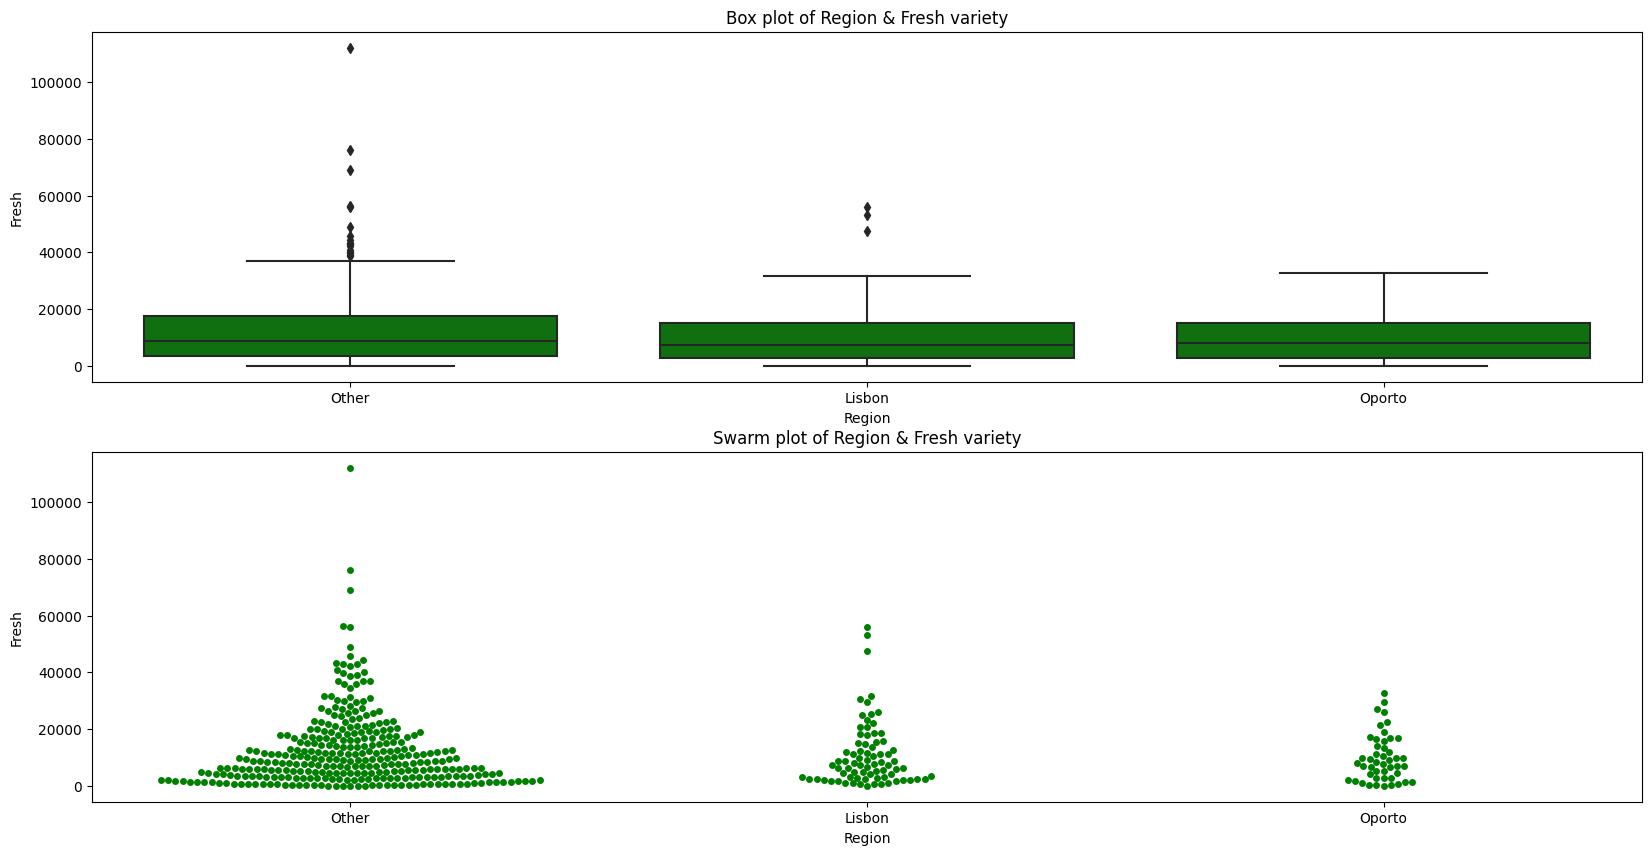

In [36]:

plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Fresh variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Fresh",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Fresh variety"
sns.swarmplot(x="Region",y= "Fresh",data =df ,color='green').set(title =swarm_plot_title);

In [37]:
df_Regionwise_Milk_summ=pd.concat((df_Other_summ.Milk_Other,df_Oporto_summ.Milk_Oporto,df_Lisbon_summ.Milk_Lisbon),axis=1,sort=False)
df_Regionwise_Milk_summ

,Milk_Other,Milk_Oporto,Milk_Lisbon
count,316.00,47.00,77.00
mean,5977.09,5088.17,5486.42
std,7935.46,5826.34,5704.86
min,55.00,333.00,258.00
25%,1634.00,1430.50,1372.00
50%,3684.50,2374.00,3748.00
75%,7198.75,5772.50,7503.00
max,73498.00,25071.00,28326.00
CV,1.33,1.13,1.03
Skew,4.25,1.80,1.92


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


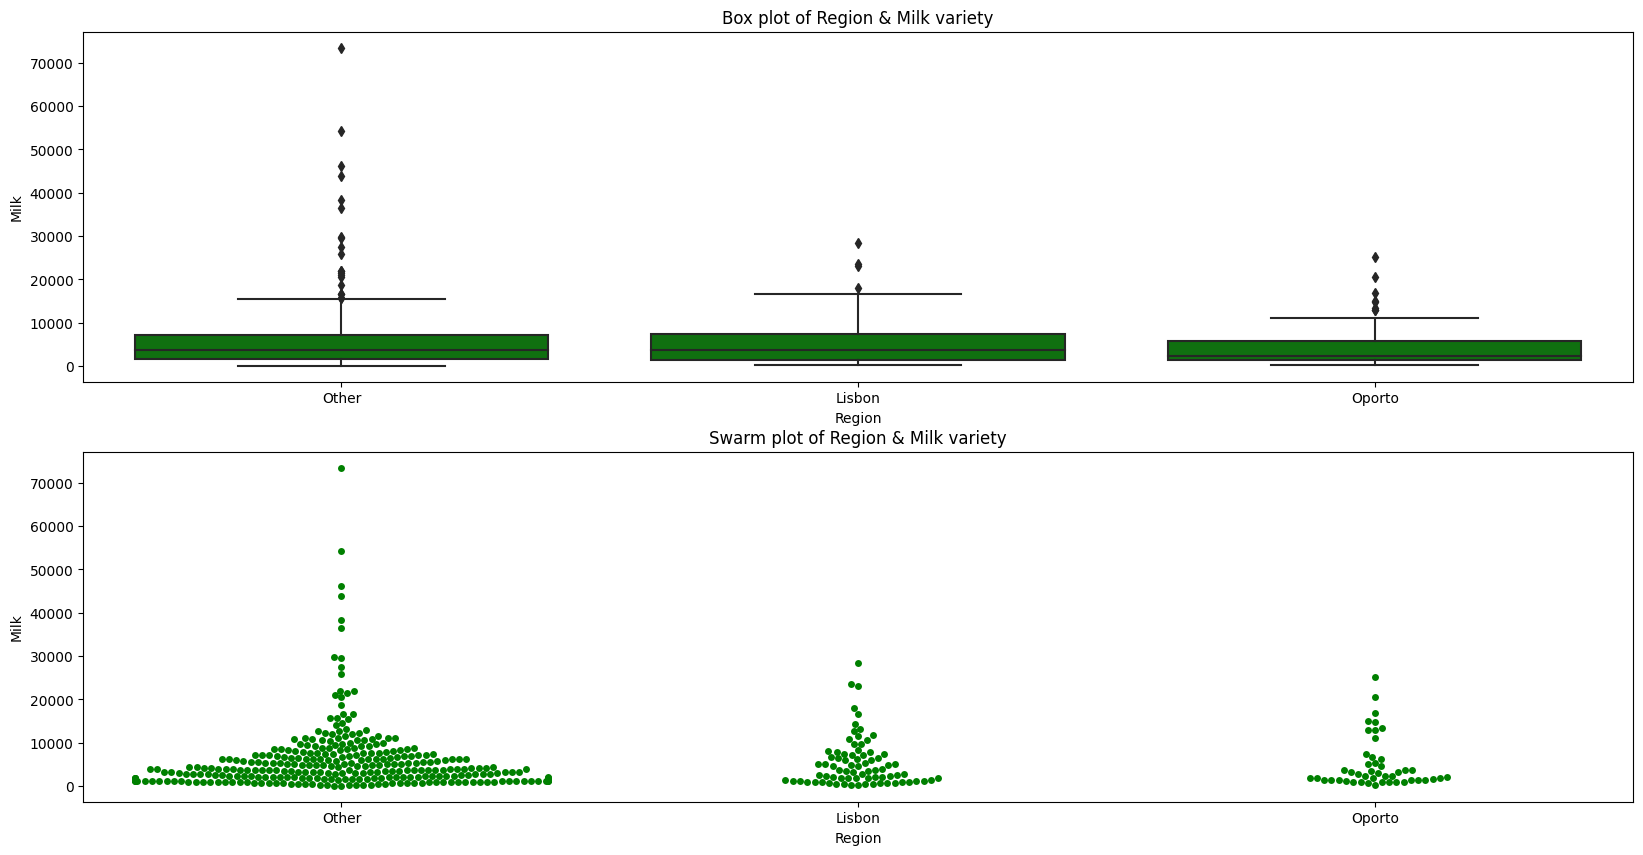

In [38]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Milk variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Milk",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Milk variety"
sns.swarmplot(x="Region",y= "Milk",data =df ,color='green').set(title =swarm_plot_title);

In [39]:
df_Regionwise_Grocery_summ=pd.concat((df_Other_summ.Grocery_Other,df_Oporto_summ.Grocery_Oporto,df_Lisbon_summ.Grocery_Lisbon),axis=1,sort=False)
df_Regionwise_Grocery_summ

,Grocery_Other,Grocery_Oporto,Grocery_Lisbon
count,316.00,47.00,77.00
mean,7896.36,9218.60,7403.08
std,9537.29,10842.75,8496.29
min,3.00,1330.00,489.00
25%,2141.50,2792.50,2046.00
50%,4732.00,6114.00,3838.00
75%,10559.75,11758.50,9490.00
max,92780.00,67298.00,39694.00
CV,1.21,1.16,1.14
Skew,3.84,3.64,2.02


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


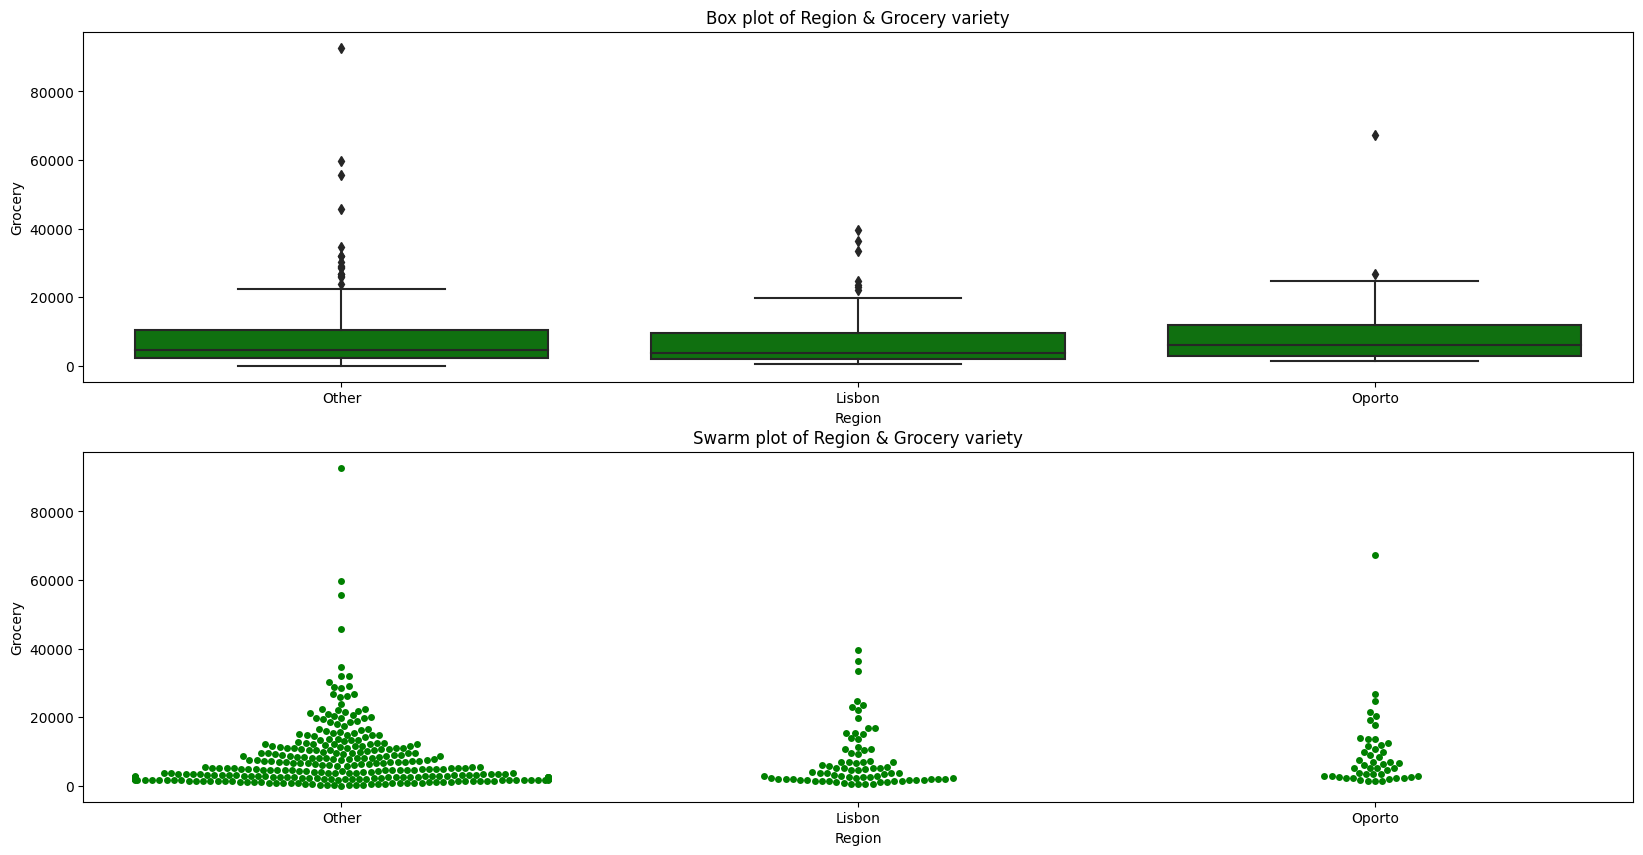

In [40]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Grocery variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Grocery",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Grocery variety"
sns.swarmplot(x="Region",y= "Grocery",data =df ,color='green').set(title =swarm_plot_title);

In [41]:
df_Regionwise_Frozen_summ=pd.concat((df_Other_summ.Frozen_Other,df_Oporto_summ.Frozen_Oporto,df_Lisbon_summ.Frozen_Lisbon),axis=1,sort=False)
df_Regionwise_Frozen_summ

,Frozen_Other,Frozen_Oporto,Frozen_Lisbon
count,316.00,47.00,77.00
mean,2944.59,4045.36,3000.34
std,4260.13,9151.78,3092.14
min,25.00,131.00,61.00
25%,664.75,811.50,950.00
50%,1498.00,1455.00,1801.00
75%,3354.75,3272.00,4324.00
max,36534.00,60869.00,18711.00
CV,1.44,2.24,1.02
Skew,3.96,5.49,2.33


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


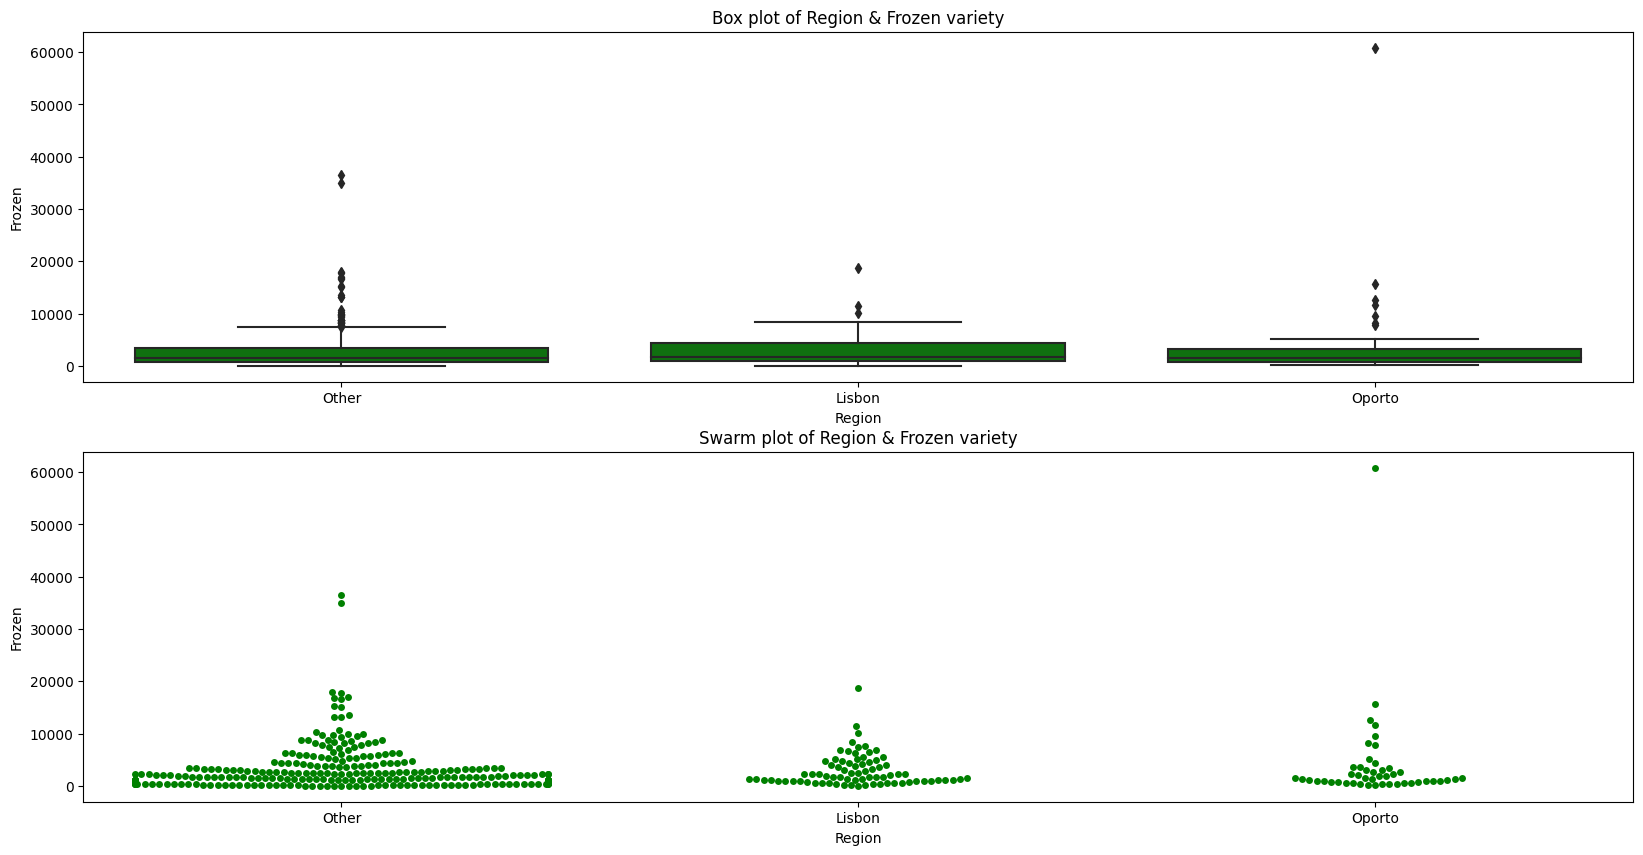

In [42]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Frozen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Frozen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Frozen variety"
sns.swarmplot(x="Region",y= "Frozen",data =df ,color='green').set(title =swarm_plot_title);

In [43]:
df_Regionwise_Detergents_Paper_summ=pd.concat((df_Other_summ.Detergents_Paper_Other,df_Oporto_summ.Detergents_Paper_Oporto,df_Lisbon_summ.Detergents_Paper_Lisbon),axis=1,sort=False)
df_Regionwise_Detergents_Paper_summ

,Detergents_Paper_Other,Detergents_Paper_Oporto,Detergents_Paper_Lisbon
count,316.00,47.00,77.00
mean,2817.75,3687.47,2651.12
std,4593.05,6514.72,4208.46
min,3.00,15.00,5.00
25%,251.25,282.50,284.00
50%,856.00,811.00,737.00
75%,3875.75,4324.50,3593.00
max,40827.00,38102.00,19410.00
CV,1.63,1.75,1.58
Skew,3.71,3.62,2.36


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


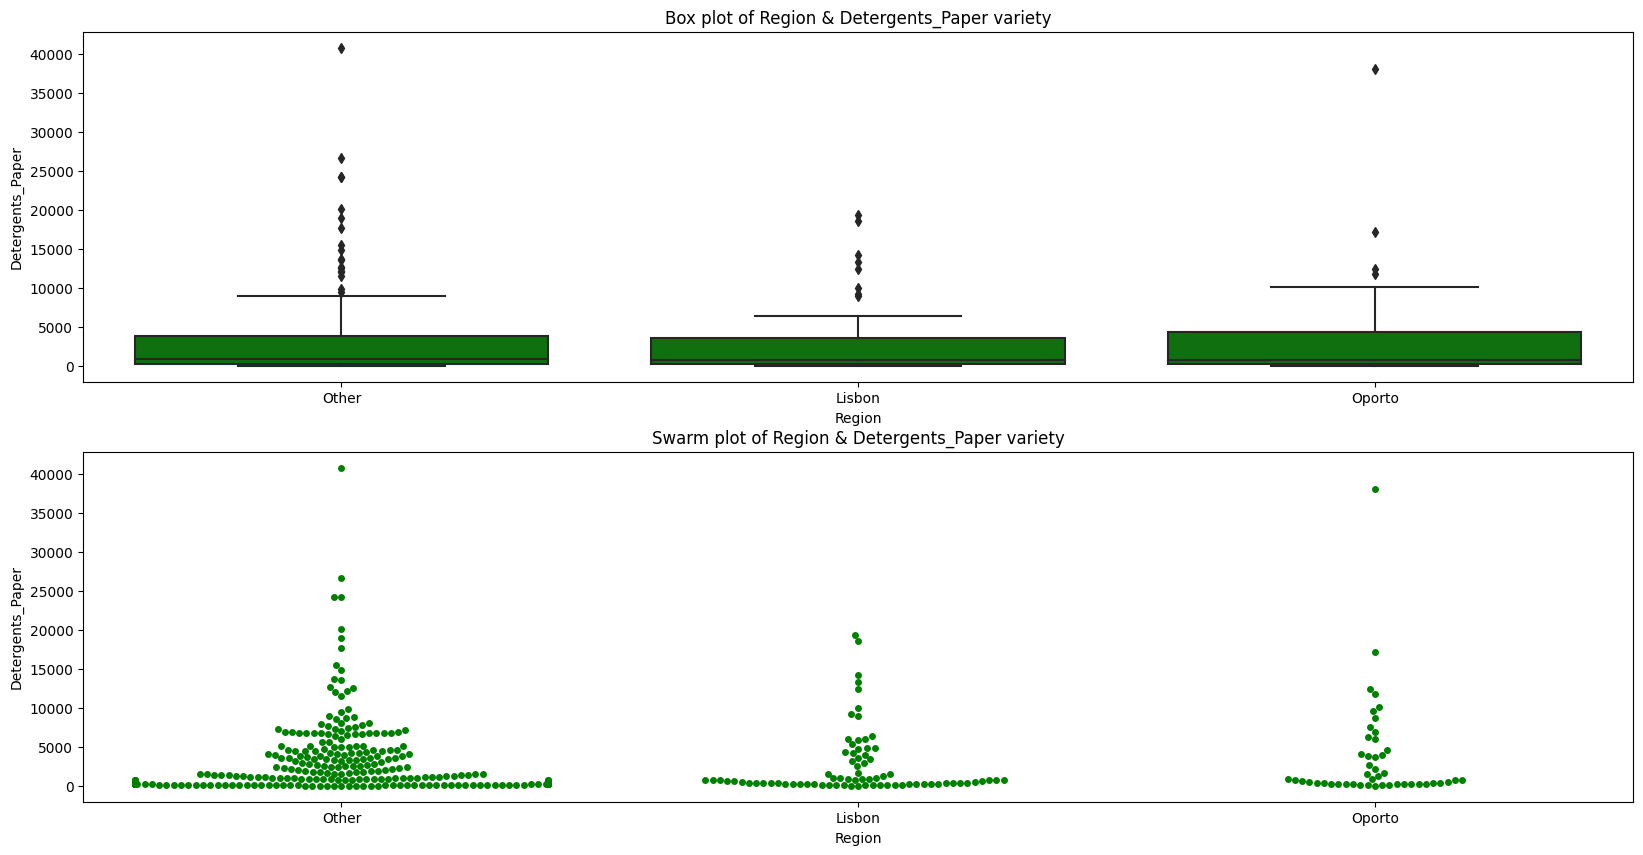

In [44]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Detergents_Paper variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Detergents_Paper",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Detergents_Paper variety"
sns.swarmplot(x="Region",y= "Detergents_Paper",data =df ,color='green').set(title =swarm_plot_title);

In [45]:
df_Regionwise_Delicatessen_summ=pd.concat((df_Other_summ.Delicatessen_Other,df_Oporto_summ.Delicatessen_Oporto,df_Lisbon_summ.Delicatessen_Lisbon),axis=1,sort=False)
df_Regionwise_Delicatessen_summ

,Delicatessen_Other,Delicatessen_Oporto,Delicatessen_Lisbon
count,316.00,47.00,77.00
mean,1620.60,1159.70,1354.90
std,3232.58,1050.74,1345.42
min,3.00,51.00,7.00
25%,402.00,540.50,548.00
50%,994.00,898.00,806.00
75%,1832.75,1538.50,1775.00
max,47943.00,5609.00,6854.00
CV,1.99,0.90,0.99
Skew,10.21,2.15,2.05


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


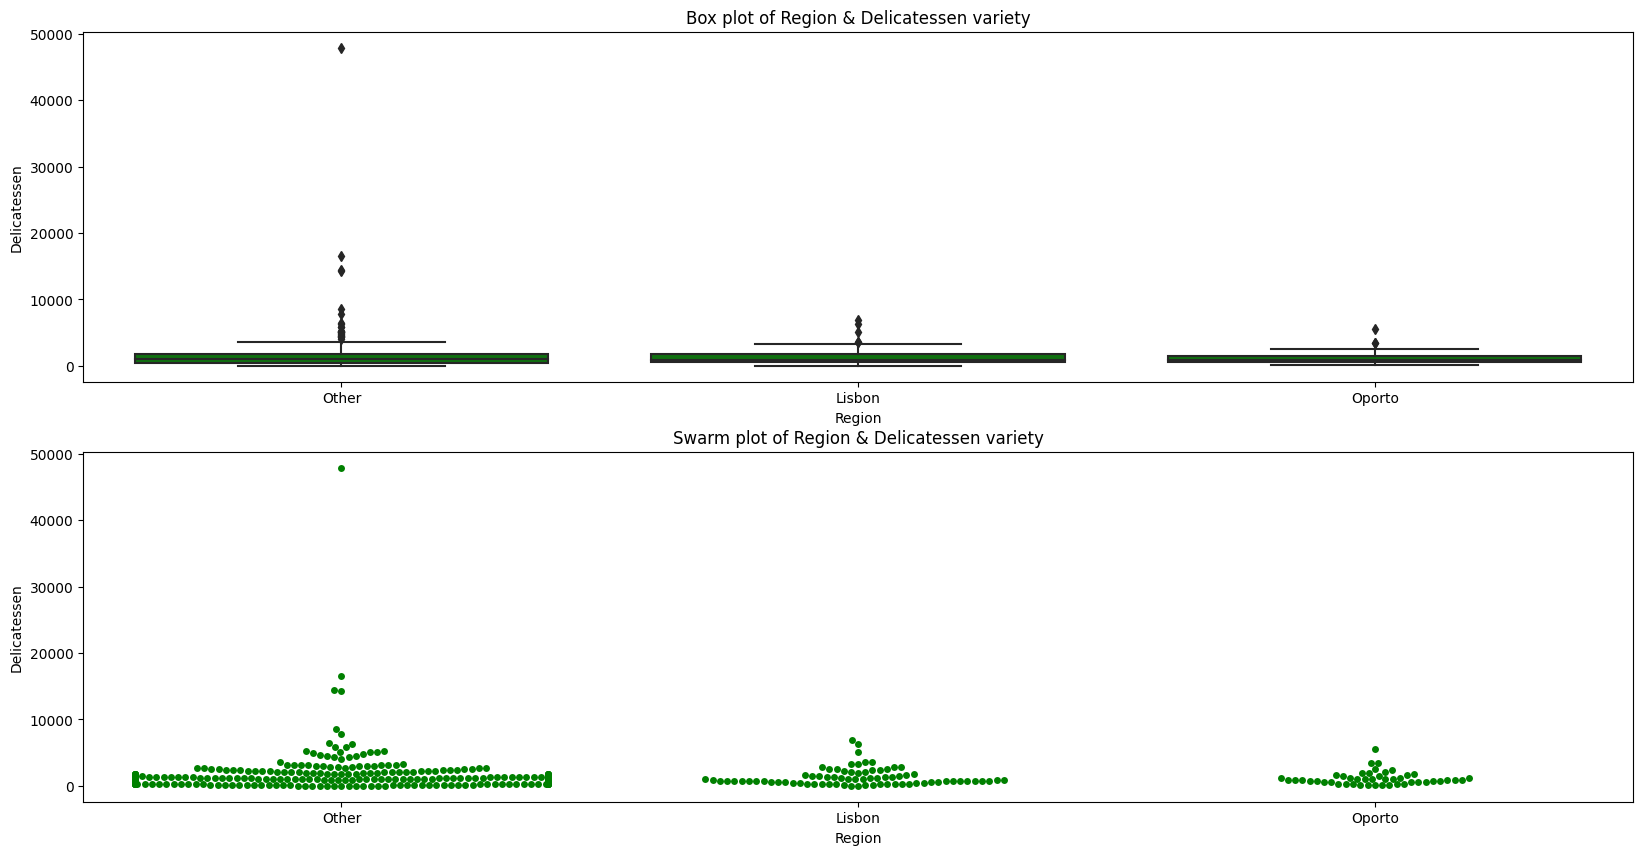

In [46]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Delicatessen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Delicatessen variety"
sns.swarmplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =swarm_plot_title);

In [47]:
df_Hotel=df[df["Channel"]=='Hotel']
df_Retail=df[df["Channel"]=='Retail']

In [48]:
# dropping series which are not required
df_Hotel.drop('Buyer/Spender',axis=1,inplace=True)
df_Hotel.drop('Total_Spend',axis=1,inplace=True)
df_Retail.drop('Buyer/Spender',axis=1,inplace=True)
df_Retail.drop('Total_Spend',axis=1,inplace=True)

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\3826540333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Hotel.drop('Buyer/Spender',axis=1,inplace=True)
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\3826540333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Hotel.drop('Total_Spend',axis=1,inplace=True)
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\3826540333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [49]:
df_Hotel_summ=pd.DataFrame(df_Hotel.describe().round(2))
df_Hotel_summ.loc["CV"]= CV_row(df_Hotel)
df_Hotel_summ.loc["Skew"]= Skew_row(df_Hotel)
df_Hotel_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.00,298.00,298.00,298.00,298.00,298.00
mean,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
std,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,4070.25,1164.50,1703.75,830.00,183.25,379.00
50%,9581.50,2157.00,2684.00,2057.50,385.50,821.00
75%,18274.75,4029.50,5076.75,4558.75,899.50,1548.00
max,112151.00,43950.00,21042.00,60869.00,6907.00,47943.00
CV,1.02,1.26,0.89,1.50,1.39,2.22
Skew,2.51,4.66,2.12,5.21,2.86,11.52


In [50]:
df_Retail_summ=pd.DataFrame(df_Retail.describe().round(2))
df_Retail_summ.loc["CV"]= CV_row(df_Retail)
df_Retail_summ.loc["Skew"]= Skew_row(df_Retail)
df_Retail_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,142.00,142.00,142.00,142.00,142.00,142.00
mean,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44
std,8987.71,9679.63,12267.32,1812.80,6291.09,1953.80
min,18.00,928.00,2743.00,33.00,332.00,3.00
25%,2347.75,5938.00,9245.25,534.25,3683.50,566.75
50%,5993.50,7812.00,12390.00,1081.00,5614.50,1350.00
75%,12229.75,12162.75,20183.50,2146.75,8662.50,2156.00
max,44466.00,73498.00,92780.00,11559.00,40827.00,16523.00
CV,1.01,0.90,0.75,1.09,0.86,1.11
Skew,1.59,3.41,2.98,2.53,2.61,3.77


In [51]:
# renaming the cols and adding suffix
col_name=[]
col_name=new_col_name(df_Hotel_summ,"_Hotel")    
df_Hotel_summ.columns =   col_name  
col_name=new_col_name(df_Retail_summ,"_Retail")    
df_Retail_summ.columns =   col_name  
df_Hotel_summ

,Fresh_Hotel,Milk_Hotel,Grocery_Hotel,Frozen_Hotel,Detergents_Paper_Hotel,Delicatessen_Hotel
count,298.00,298.00,298.00,298.00,298.00,298.00
mean,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
std,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,4070.25,1164.50,1703.75,830.00,183.25,379.00
50%,9581.50,2157.00,2684.00,2057.50,385.50,821.00
75%,18274.75,4029.50,5076.75,4558.75,899.50,1548.00
max,112151.00,43950.00,21042.00,60869.00,6907.00,47943.00
CV,1.02,1.26,0.89,1.50,1.39,2.22
Skew,2.51,4.66,2.12,5.21,2.86,11.52


In [52]:
df_Channelwise_Fresh_summ=pd.concat((df_Hotel_summ["Fresh_Hotel"],df_Retail_summ["Fresh_Retail"]),axis=1,sort=False)
df_Channelwise_Fresh_summ

,Fresh_Hotel,Fresh_Retail
count,298.00,142.00
mean,13475.56,8904.32
std,13831.69,8987.71
min,3.00,18.00
25%,4070.25,2347.75
50%,9581.50,5993.50
75%,18274.75,12229.75
max,112151.00,44466.00
CV,1.02,1.01
Skew,2.51,1.59


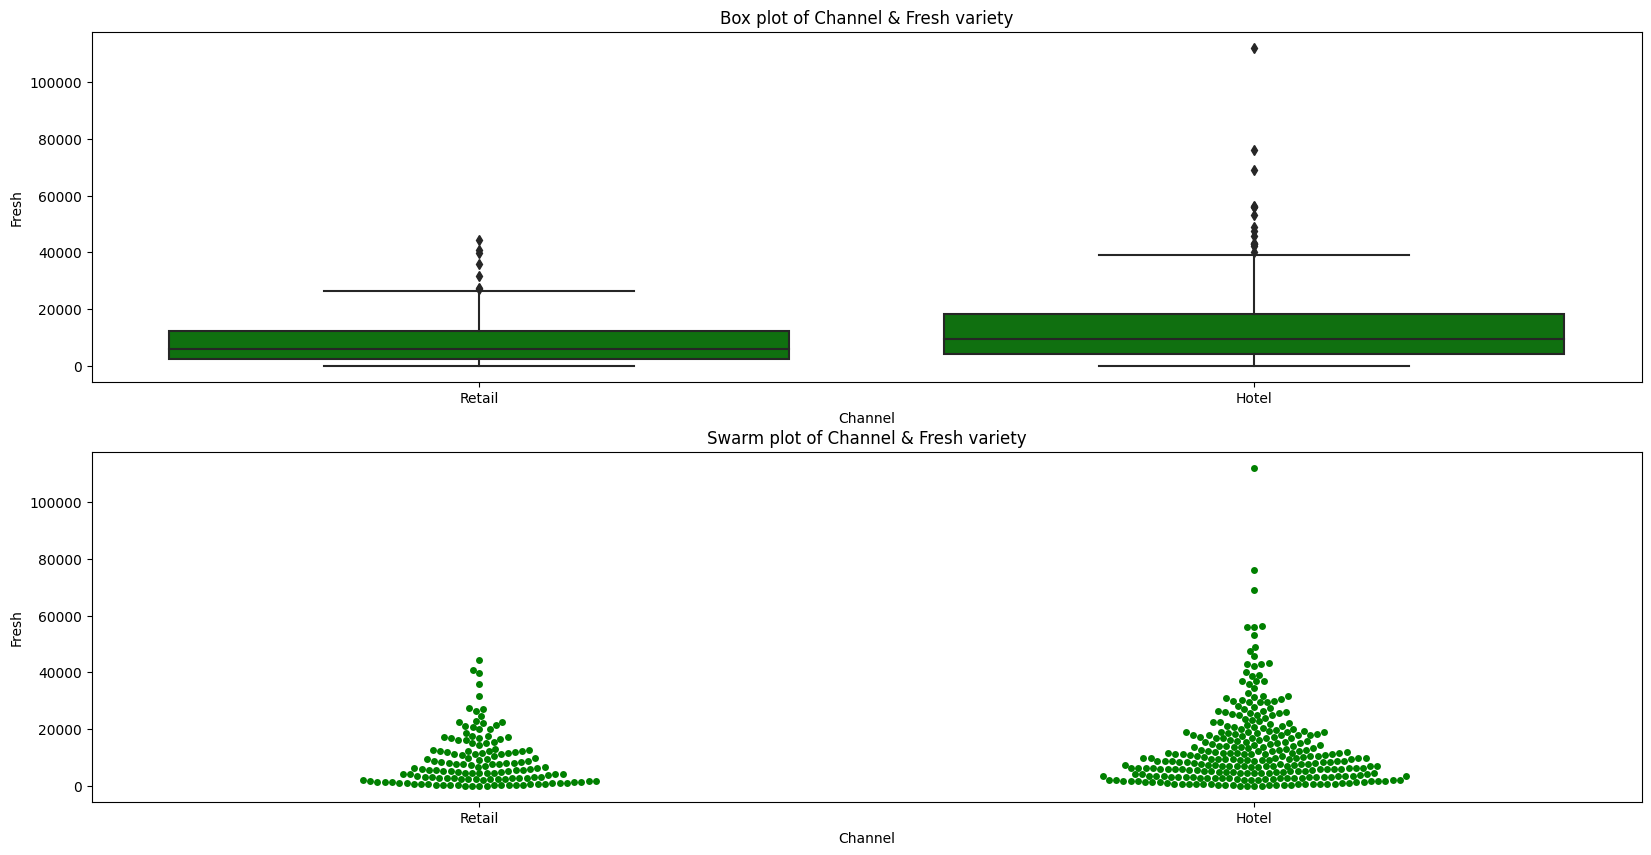

In [53]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Fresh variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Fresh",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Fresh variety"
sns.swarmplot(x="Channel",y= "Fresh",data =df ,color='green').set(title =swarm_plot_title);

In [54]:
df_Channelwise_Milk_summ=pd.concat((df_Hotel_summ["Milk_Hotel"],df_Retail_summ["Milk_Retail"]),axis=1,sort=False)
df_Channelwise_Milk_summ

,Milk_Hotel,Milk_Retail
count,298.00,142.00
mean,3451.72,10716.50
std,4352.17,9679.63
min,55.00,928.00
25%,1164.50,5938.00
50%,2157.00,7812.00
75%,4029.50,12162.75
max,43950.00,73498.00
CV,1.26,0.90
Skew,4.66,3.41


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


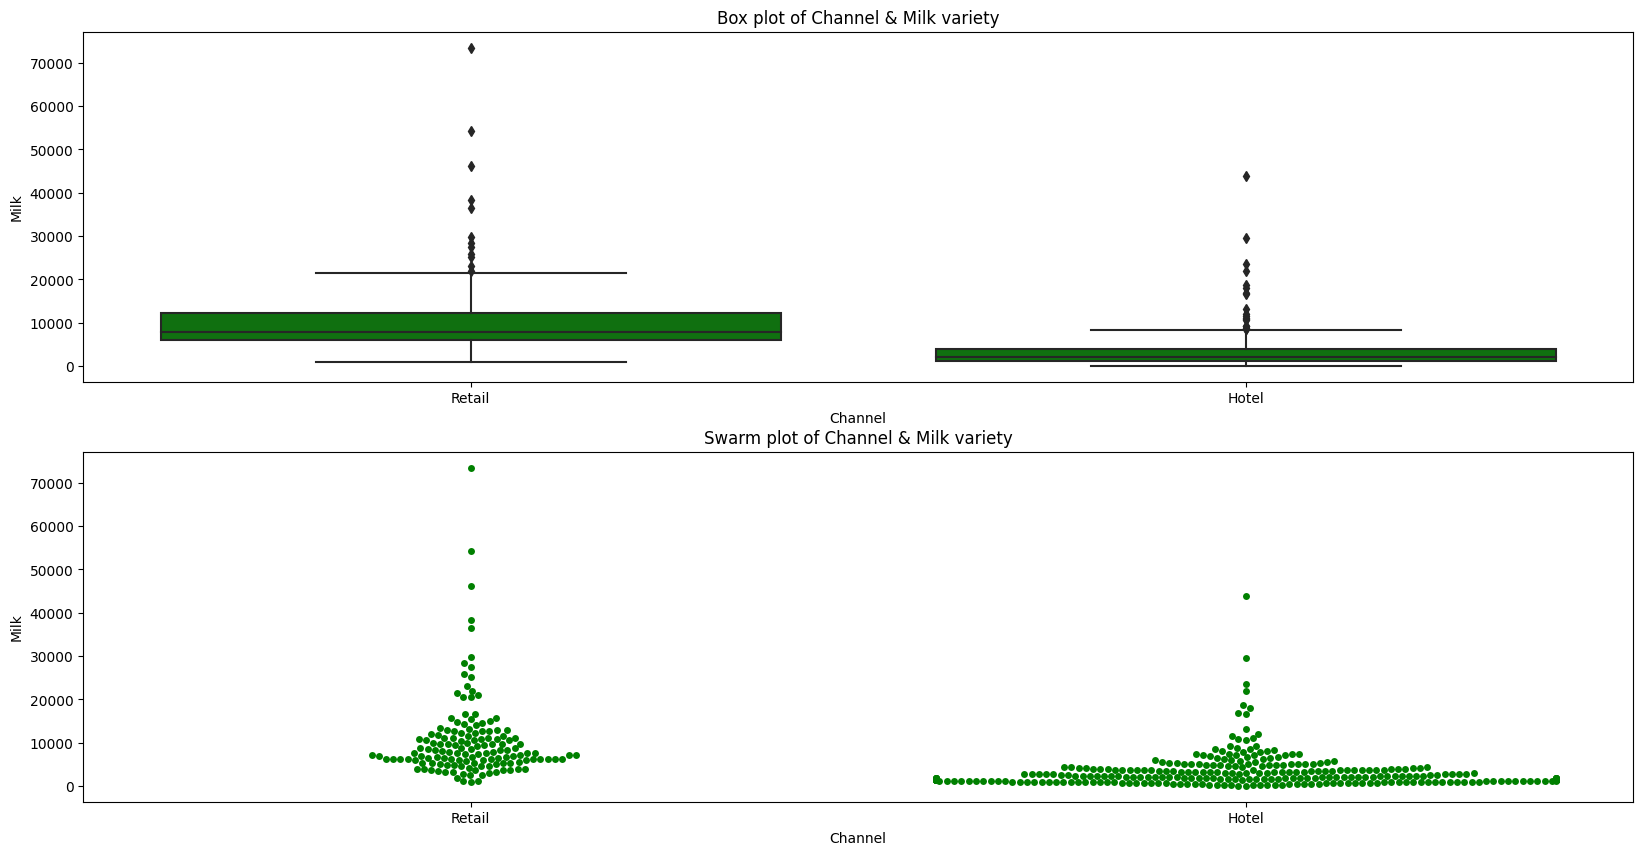

In [55]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Milk variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Milk",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Milk variety"
sns.swarmplot(x="Channel",y= "Milk",data =df ,color='green').set(title =swarm_plot_title);

In [56]:
df_Channelwise_Grocery_summ=pd.concat((df_Hotel_summ["Grocery_Hotel"],df_Retail_summ["Grocery_Retail"]),axis=1,sort=False)
df_Channelwise_Grocery_summ

,Grocery_Hotel,Grocery_Retail
count,298.00,142.00
mean,3962.14,16322.85
std,3545.51,12267.32
min,3.00,2743.00
25%,1703.75,9245.25
50%,2684.00,12390.00
75%,5076.75,20183.50
max,21042.00,92780.00
CV,0.89,0.75
Skew,2.12,2.98


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


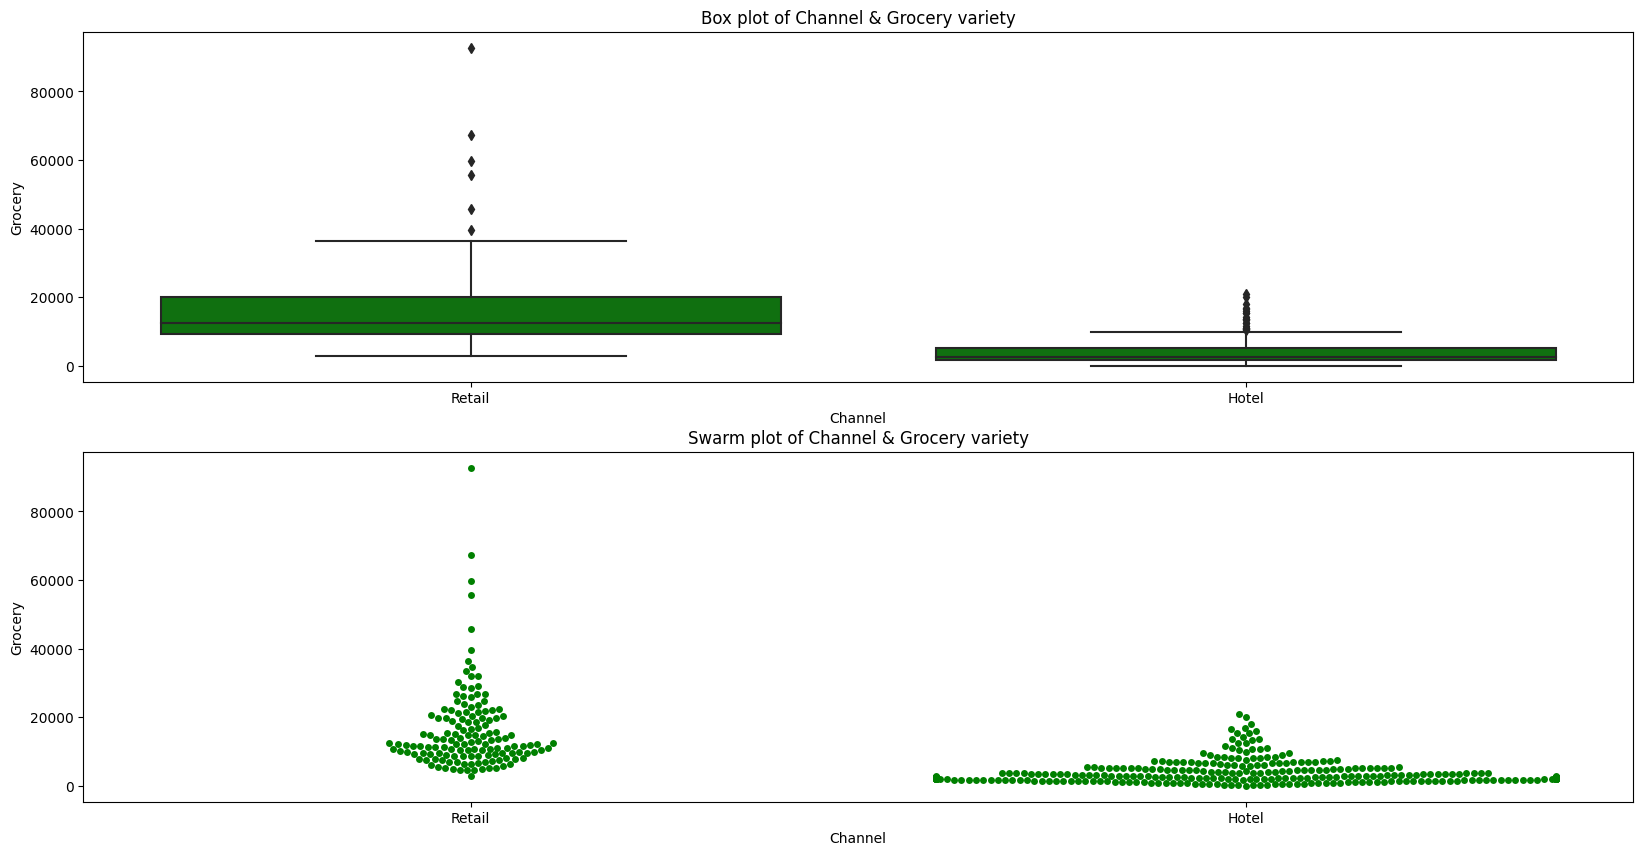

In [57]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Grocery variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Grocery",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Grocery variety"
sns.swarmplot(x="Channel",y= "Grocery",data =df ,color='green').set(title =swarm_plot_title);

In [58]:
df_Channelwise_Frozen_summ=pd.concat((df_Hotel_summ["Frozen_Hotel"],df_Retail_summ["Frozen_Retail"]),axis=1,sort=False)
df_Channelwise_Frozen_summ

,Frozen_Hotel,Frozen_Retail
count,298.00,142.00
mean,3748.25,1652.61
std,5643.91,1812.80
min,25.00,33.00
25%,830.00,534.25
50%,2057.50,1081.00
75%,4558.75,2146.75
max,60869.00,11559.00
CV,1.50,1.09
Skew,5.21,2.53


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


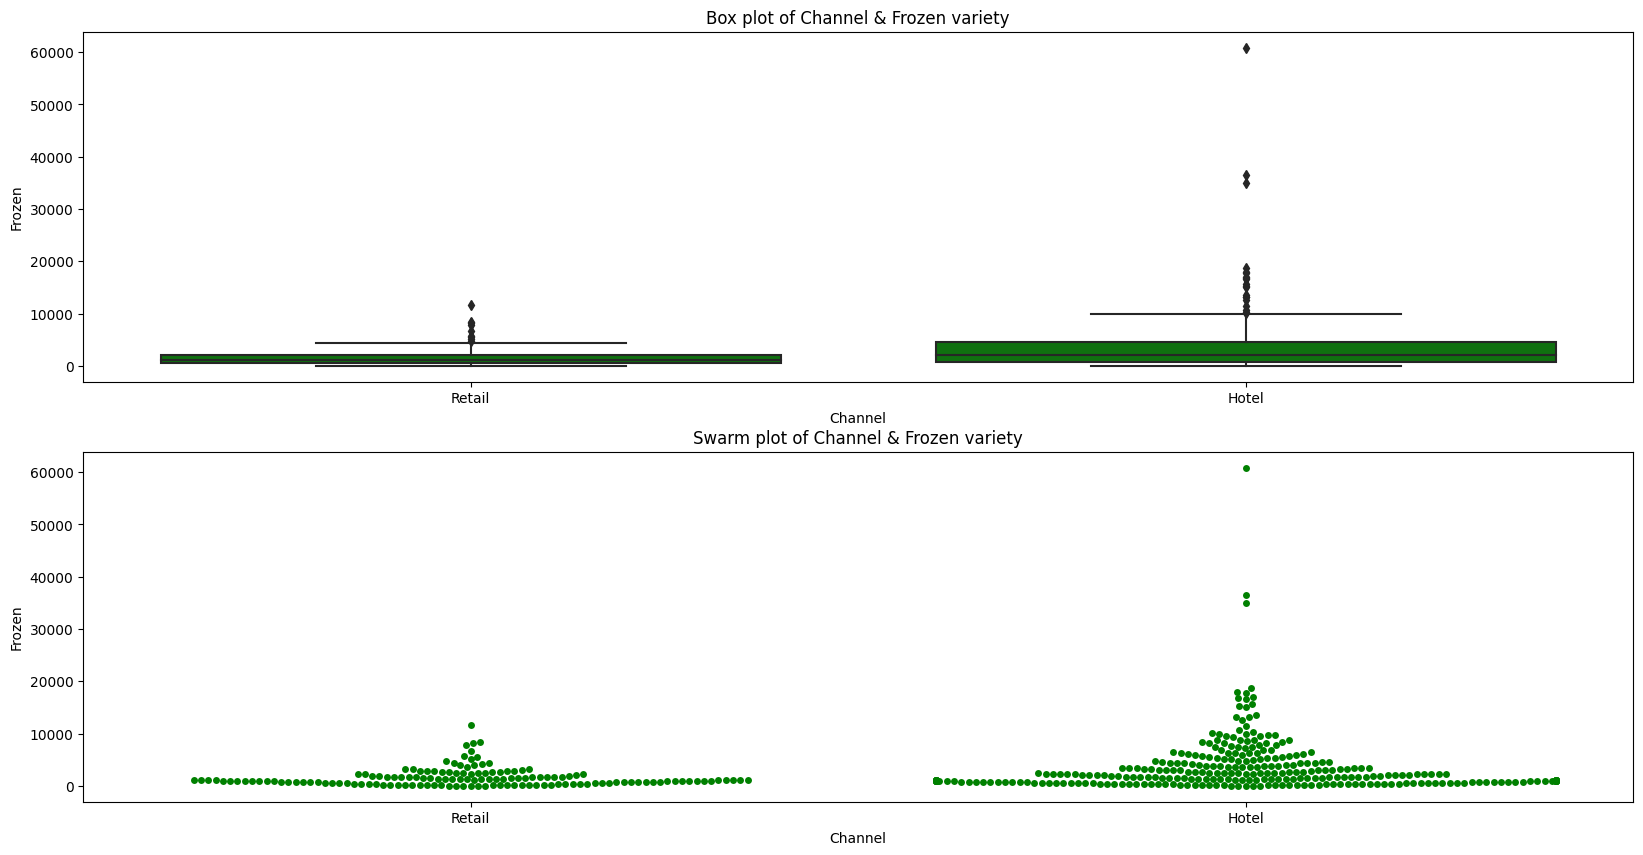

In [59]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Frozen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Frozen",data =df ,color='green').set(title=box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Frozen variety"
sns.swarmplot(x="Channel",y= "Frozen",data =df ,color='green').set(title=swarm_plot_title);

In [60]:
df_Channelwise_Detergents_Paper_summ=pd.concat((df_Hotel_summ["Detergents_Paper_Hotel"],df_Retail_summ["Detergents_Paper_Retail"]),axis=1,sort=False)
df_Channelwise_Detergents_Paper_summ

,Detergents_Paper_Hotel,Detergents_Paper_Retail
count,298.00,142.00
mean,790.56,7269.51
std,1104.09,6291.09
min,3.00,332.00
25%,183.25,3683.50
50%,385.50,5614.50
75%,899.50,8662.50
max,6907.00,40827.00
CV,1.39,0.86
Skew,2.86,2.61


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


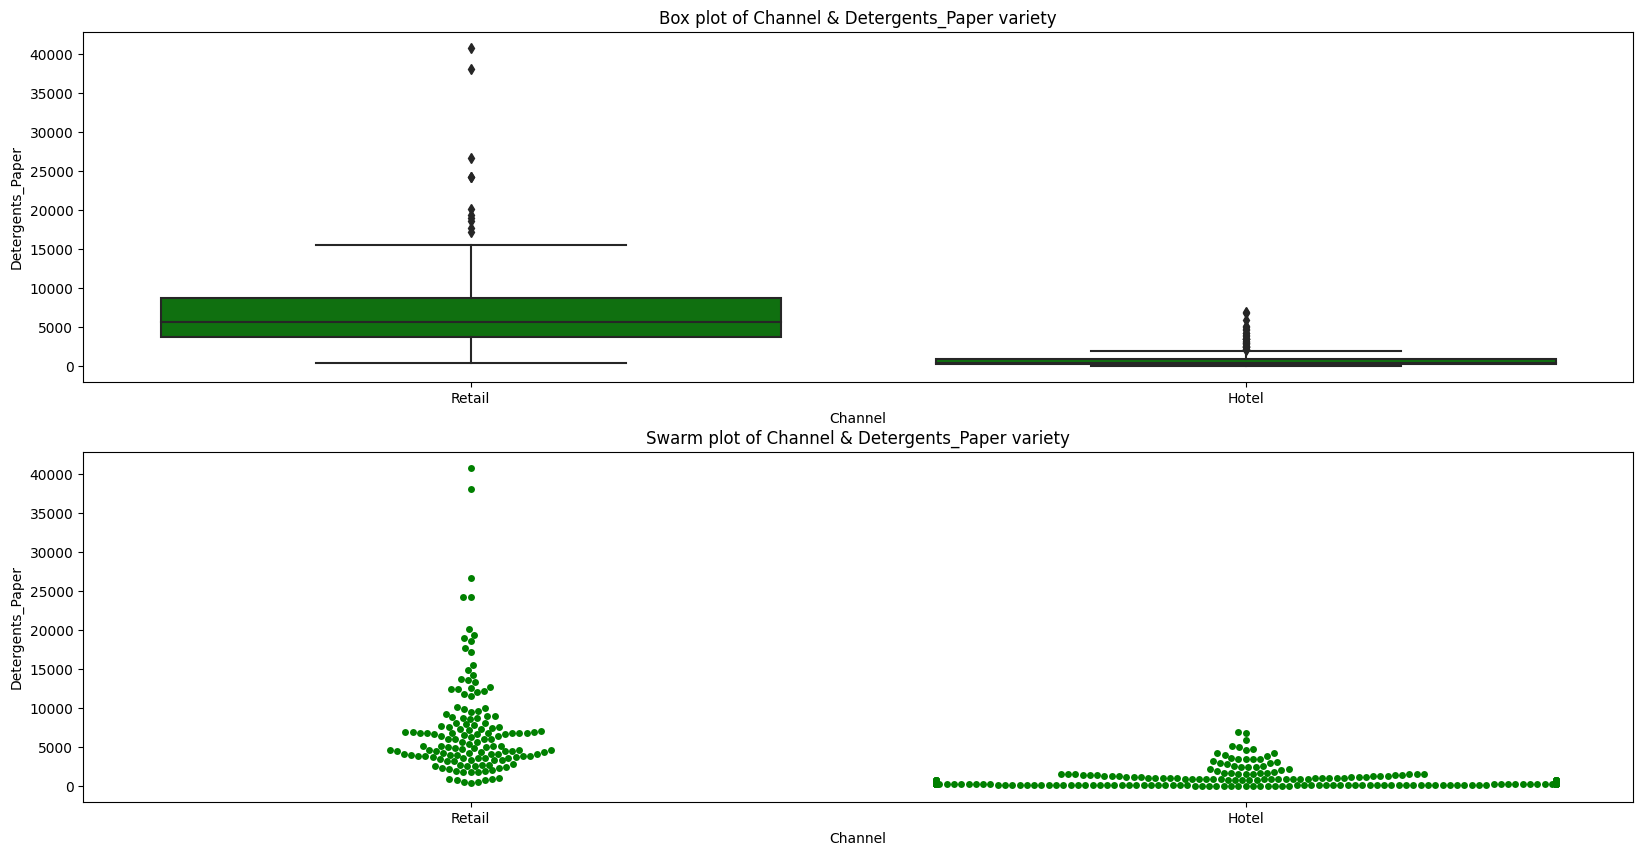

In [61]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Detergents_Paper variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Detergents_Paper",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Detergents_Paper variety"
sns.swarmplot(x="Channel",y= "Detergents_Paper",data =df ,color='green').set(title =swarm_plot_title);

In [62]:
df_Channelwise_Delicatessen_summ=pd.concat((df_Hotel_summ["Delicatessen_Hotel"],df_Retail_summ["Delicatessen_Retail"]),axis=1,sort=False)
df_Channelwise_Delicatessen_summ

,Delicatessen_Hotel,Delicatessen_Retail
count,298.00,142.00
mean,1415.96,1753.44
std,3147.43,1953.80
min,3.00,3.00
25%,379.00,566.75
50%,821.00,1350.00
75%,1548.00,2156.00
max,47943.00,16523.00
CV,2.22,1.11
Skew,11.52,3.77


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


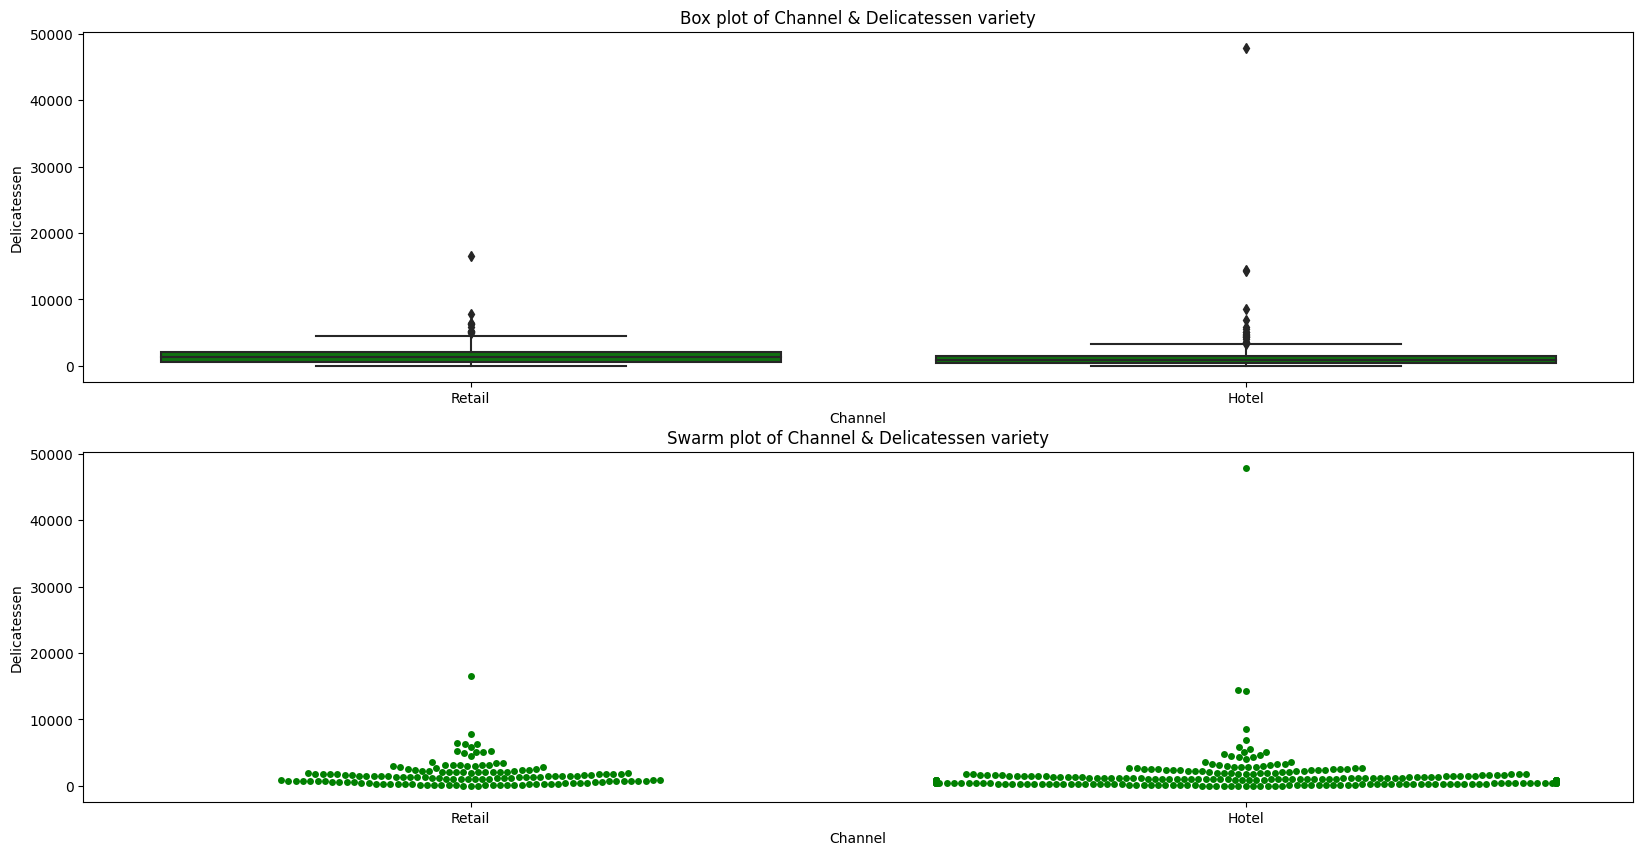

In [63]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Delicatessen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Delicatessen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Delicatessen variety"
sns.swarmplot(x="Channel",y= "Delicatessen",data =df ,color='green').set(title =swarm_plot_title);

In [64]:
dfc=df.copy()
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [65]:
# dropping cols for which behaviour is not required
dfc.drop('Total_Spend',axis=1,inplace=True)
dfc.drop('Buyer/Spender',axis=1,inplace=True)

In [66]:
df_summ=pd.DataFrame(dfc.describe().round(2))
df_summ.loc["CV"]= CV_row(dfc)
#df_summ.loc["Skew"]= Skew_row(dfc)
df_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00
CV,1.05,1.27,1.19,1.58,1.65,1.85


C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\harikrishnan.m\AppData\Local\Programs\Python\Python

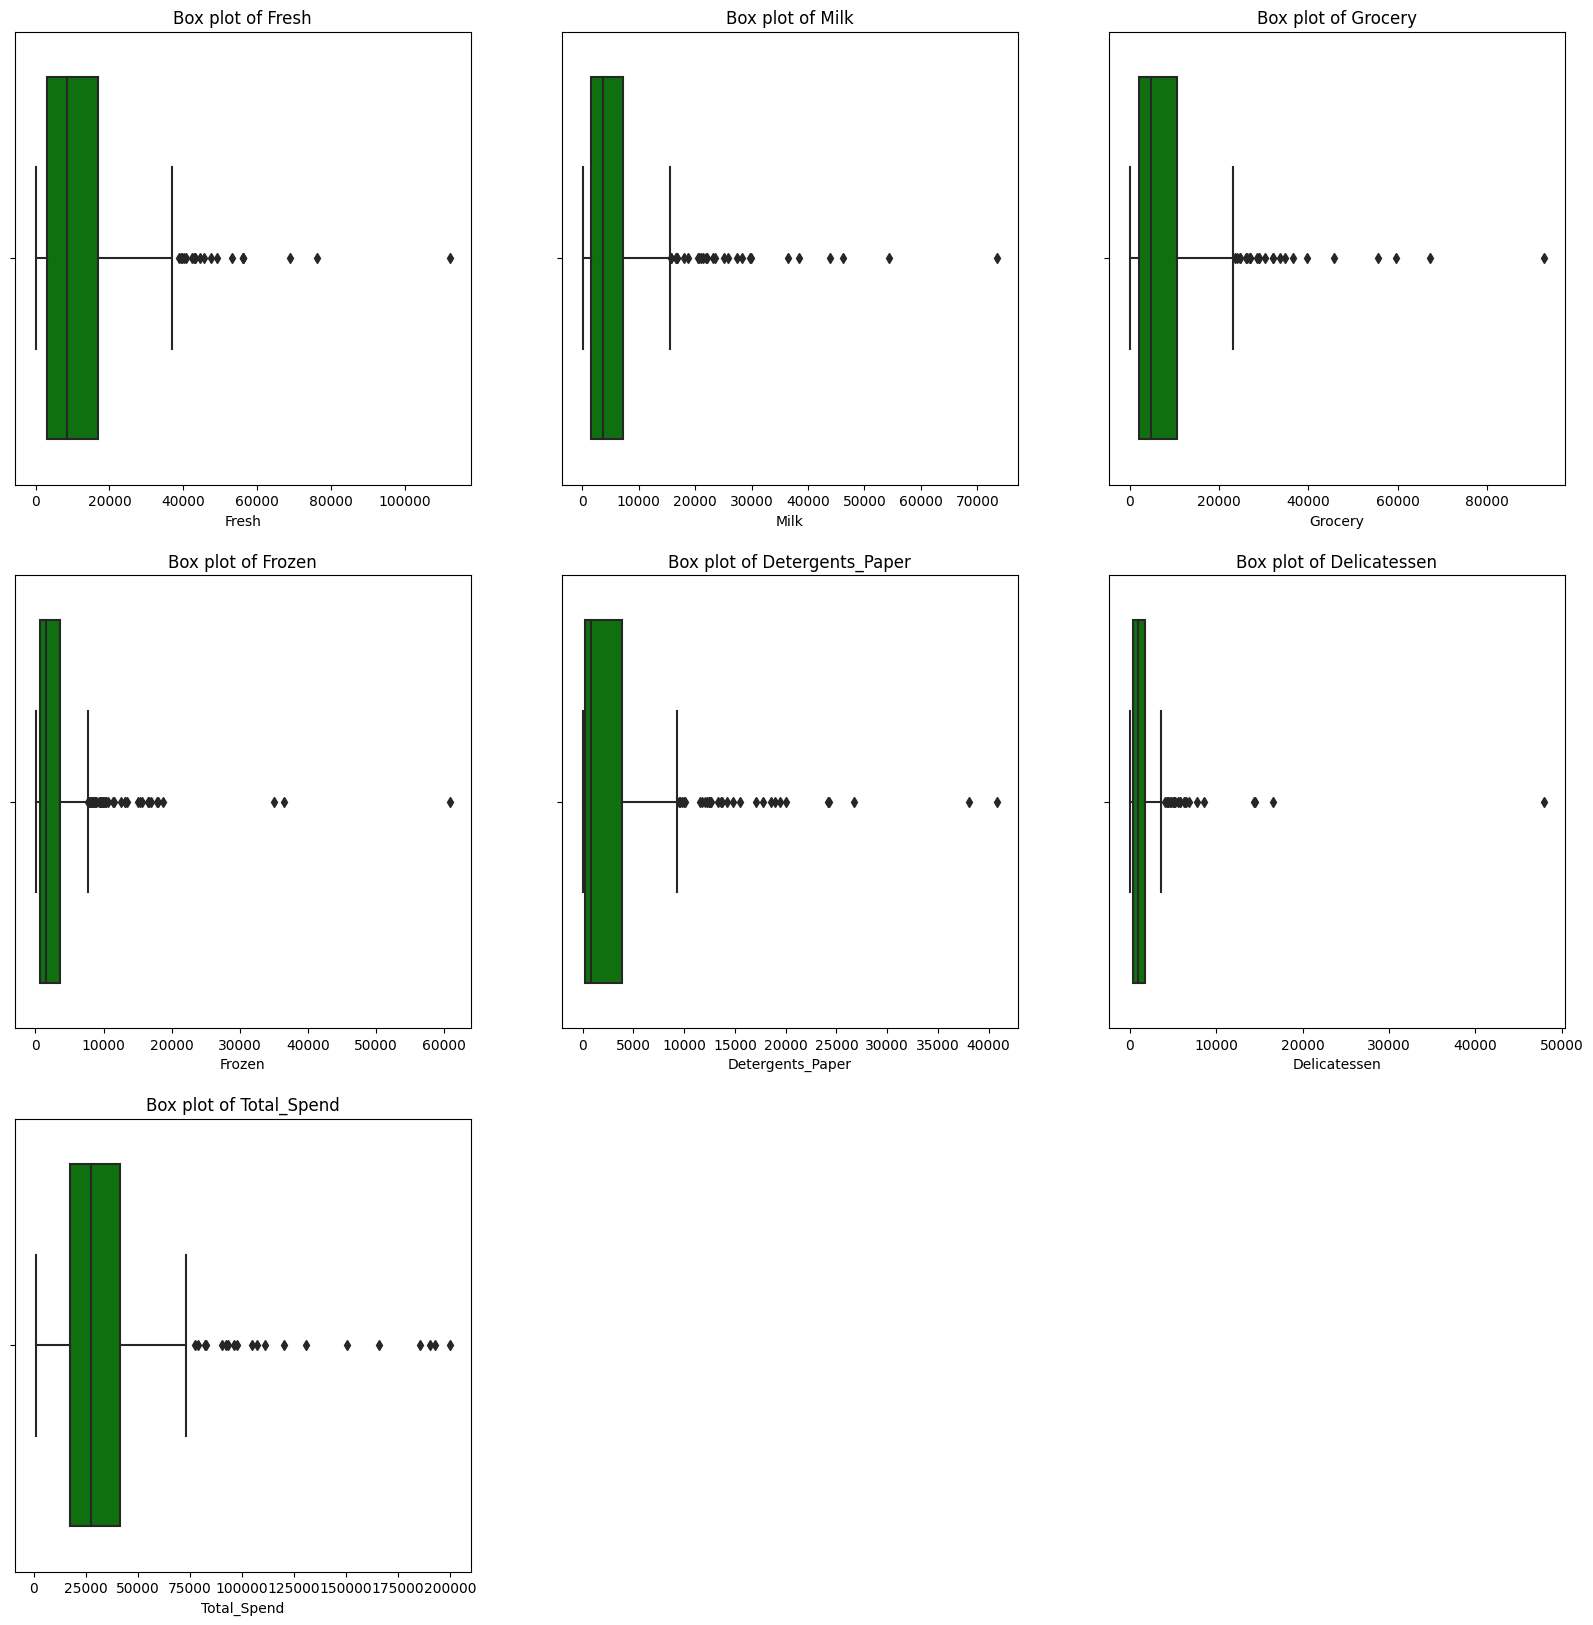

In [67]:
# Checking for Outliers
plt.figure(figsize= (20,20))
box_plot_no=1
for col in df.columns :
    if (col != 'Channel') and (col != 'Region') and (col != 'Buyer/Spender'):
        box_plot_title = "Box plot of " + col
        plt.subplot(3,3,box_plot_no)
        sns.boxplot(x= col,data =df ,color='green', orient = 'v').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 

In [68]:
# checking Region and channel counts
pd.crosstab(df["Region"],df["Channel"],margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,59,18,77
Oporto,28,19,47
Other,211,105,316
All,298,142,440


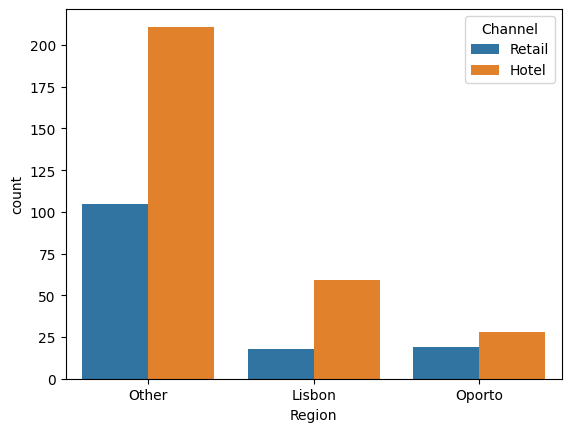

In [69]:
sns.countplot(x='Region' , hue='Channel',data=df);

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\4050372731.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False );


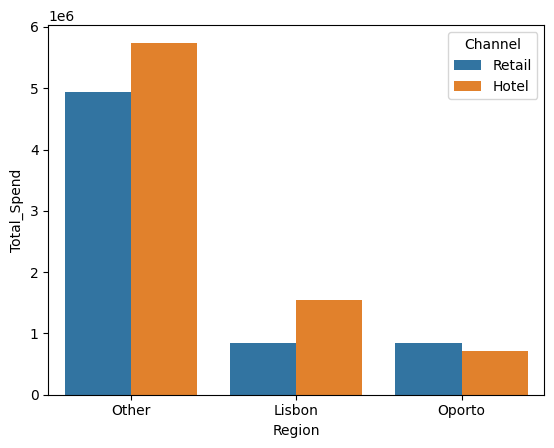

In [70]:
sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False );

In [71]:
# checking correlation
corr = dfc.corr()
corr

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\2774071779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfc.corr()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


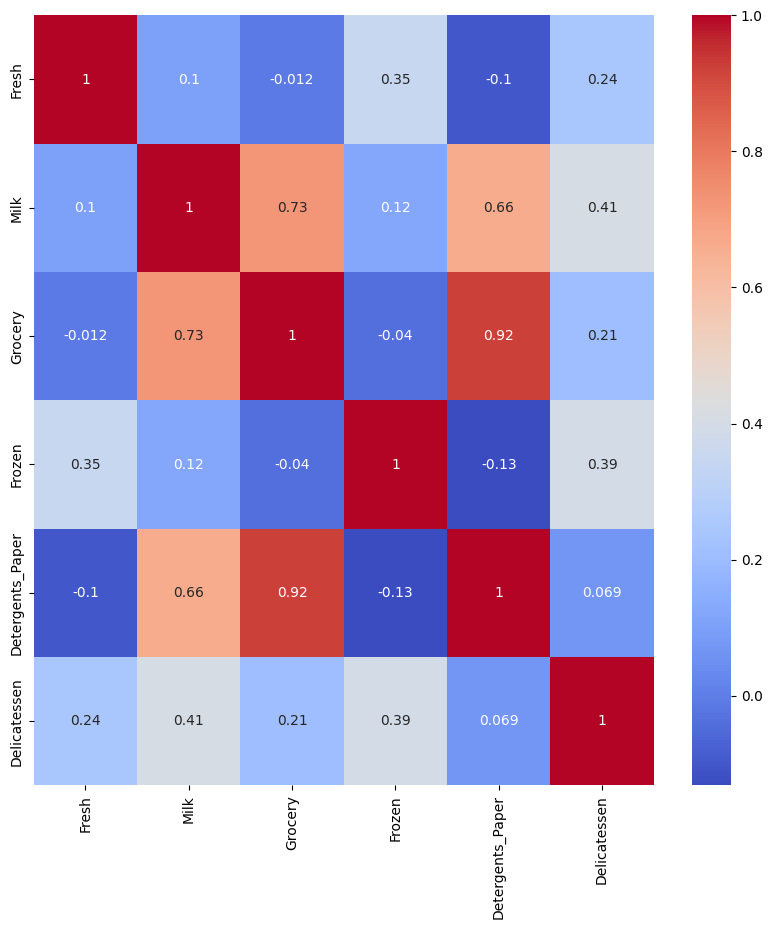

In [72]:
# plotting a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

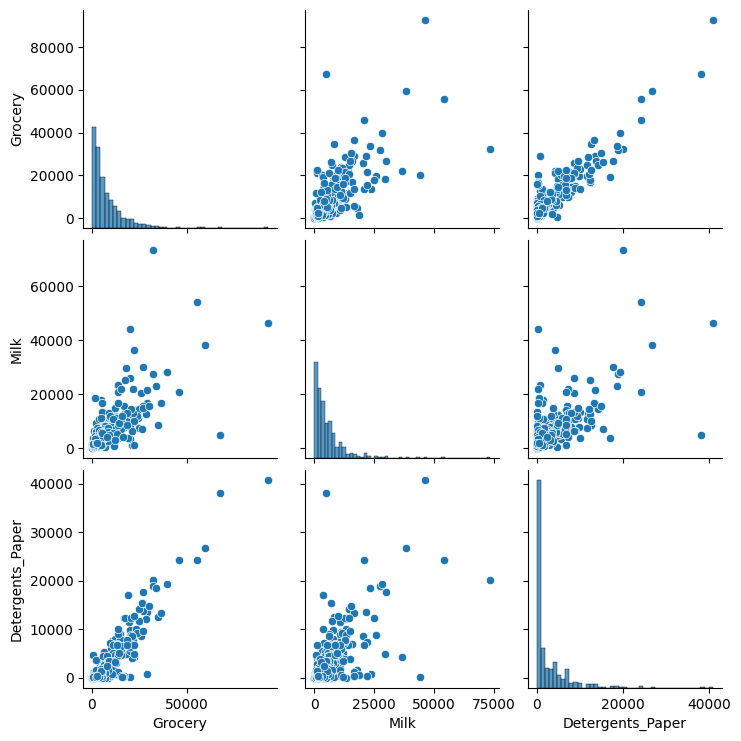

In [73]:

sns.pairplot(dfc[["Grocery","Milk","Detergents_Paper"]]);

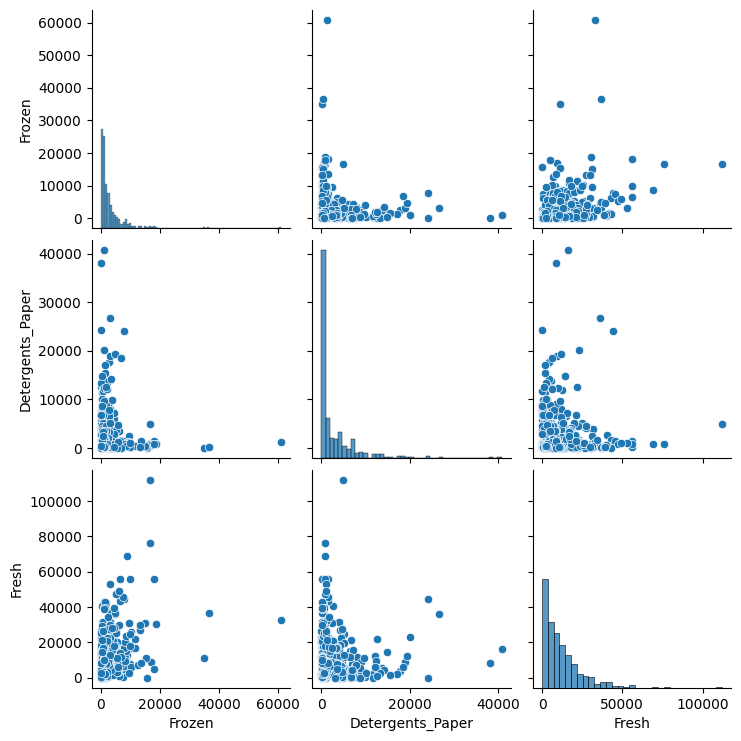

In [74]:
sns.pairplot(dfc[["Frozen","Detergents_Paper","Fresh"]]);

In [75]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Region','Channel'],aggfunc=sum,margins=True))
dfd.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfd

Buyer/Spender  Delicatessen  Detergents_Paper    Fresh  \
Region Channel                                                           
All                     97020        670943           1267857  5280131   
Other  Hotel            48020        320358            165990  2928269   
       Retail           16006        191752            724420  1032308   
Lisbon Hotel            14026         70632             56081   761233   
       Retail            4069         33695            148055    93600   
Oporto Retail            5911         23541            159795   138506   
       Hotel             8988         30965             13516   326215   

                 Frozen  Grocery     Milk  Total_Spend  
Region Channel                                          
All             1351650  3498562  2550357     14619500  
Other  Hotel     771606   820101   735753      5742077  
       Retail    158886  1675150  1153006      4935522  
Lisbon Hotel     184512   237542   228342      1538342  
       Retail     46514   332495   194112       848471  
Oporto Retail     29271   310200   174625       835938  
       Hotel     160861   123074    64519       719150

In [76]:
    dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=sum,margins=True))
dfd

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\2476659300.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=sum,margins=True))


,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,71034,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,25986,248988,1032270,1264414,234671,2317845,1521743,6619931
All,97020,670943,1267857,5280131,1351650,3498562,2550357,14619500


In [77]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=np.median))
dfd

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_43200\2956689999.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=np.median))


,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,241.5,821,385.5,9581.5,2057.5,2684,2157,21254.5
Retail,166.5,1350,5614.5,5993.5,1081.0,12390,7812,37139.0
